# Project Team ID : "PTID-CDS-JUL-23-1577"

## Team Mambers

- Dhaya Thilak Bharathi P (dhayathilak96@gmail.com)
- Jeju (chinthaparthijeju123@gmail.com)

# Project ID : "PRCP-1027-Skin Disorder"

# Problem Statement


- Task 1:-Prepare a complete data analysis report on the given data.


- Task 2:-Create a predictive model  using machine learning techniques to predict the various classes of skin disease.


- Task3:-Suggestions to the Doctors to identify the skin diseases of the patient at the earliest. 


# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
data = pd.read_csv('dataset_35_dermatology (1).csv')
data

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
..        ...      ...               ...      ...                 ...   
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
0                    0                   0                         0   
1                    0                   0                         0   
2                    3                   0                         3   
3                    0                   0                         0   
4                    2                   0                         2   
..                 ...                 ...                       ...   
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
0                             1                  0  ...   
1                             1                  1  ...   
2                             0                  0  ...   
3                             3                  2  ...   
4                             0                  0  ...   
..                          ...                ...  ...   
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
0                                      0   
1                                      0   
2                                      0   
3                                      3   
4                                      2   
..                                   ...   
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
0                                          0           3   
1                                          0           0   
2                                          2           3   
3                                          0           0   
4                                          3           2   
..                                       ...         ...   
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
0                                0                     0   
1                                0                     0   
2                                2                     0   
3                                0                     0   
4   

# Basic Checks

In [3]:
# to count the no of categories and values corresponding to each category in target column
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

In [4]:
# data type of target column
data.Age.dtype

dtype('O')

In [5]:
# data types in the given data
data.dtypes

erythema                                     int64
scaling                                      int64
definite_borders                             int64
itching                                      int64
koebner_phenomenon                           int64
polygonal_papules                            int64
follicular_papules                           int64
oral_mucosal_involvement                     int64
knee_and_elbow_involvement                   int64
scalp_involvement                            int64
family_history                               int64
melanin_incontinence                         int64
eosinophils_in_the_infiltrate                int64
PNL_infiltrate                               int64
fibrosis_of_the_papillary_dermis             int64
exocytosis                                   int64
acanthosis                                   int64
hyperkeratosis                               int64
parakeratosis                                int64
clubbing_of_the_rete_ridges    

In [6]:
# print all the columns in the given dataset
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [360]:
# print the first five rows of the data
data.head(pd.set_option('display.max_columns',None))


erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   0   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   0   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   0   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   0   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   0   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

In [8]:
# print the last five rows of the given data
data.tail()

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
361         2        1                 1        0                   1   
362         3        2                 1        0                   1   
363         3        2                 2        2                   3   
364         2        1                 3        1                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
361                  0                   0                         0   
362                  0                   0                         0   
363                  2                   0                         2   
364                  3                   0                         2   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  ...  \
361                           0                  0  ...   
362                           0                  0  ...   
363                           0                  0  ...   
364                           0                  0  ...   
365                           3                  3  ...   

     disappearance_of_the_granular_layer  \
361                                    0   
362                                    1   
363                                    0   
364                                    0   
365                                    2   

     vacuolisation_and_damage_of_basal_layer  spongiosis  \
361                                        0           1   
362                                        0           1   
363                                        3           0   
364                                        2           0   
365                                        0           0   

     saw-tooth_appearance_of_retes  follicular_horn_plug  \
361                              0                     0   
362                              0                     0   
363                              3                     0   
364                              1                     0   
365                              0                     0   

     perifollicular_parakeratosis  inflammatory_monoluclear_inflitrate  \
361                             0                                    2   
362                             0                                    2   
363                             0                                    2   
364                             0                                    2   
365                             0                                    3   

     band-like_infiltrate  Age  class  
361                     0   25      4  
362                     0   36      4  
363                     3   28      3  
364                     3   50      3  
365                     0   35      1  

[5 rows x 35 columns]

In [9]:
# check for missing values in the given data
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

- no missing values in the given dataset

In [10]:
# checking the memory size of the given data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [11]:
# check for no of rows and columns
data.shape

(366, 35)

In [12]:
# display the rows which have null values
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

[0 rows x 35 columns]

In [13]:
# to display all the columns
pd.set_option('display.max_columns',None)

In [14]:
# to describe statistical information
data.describe().T

count      mean       std  min  25%  \
erythema                                  366.0  2.068306  0.664753  0.0  2.0   
scaling                                   366.0  1.795082  0.701527  0.0  1.0   
definite_borders                          366.0  1.549180  0.907525  0.0  1.0   
itching                                   366.0  1.366120  1.138299  0.0  0.0   
koebner_phenomenon                        366.0  0.633880  0.908016  0.0  0.0   
polygonal_papules                         366.0  0.448087  0.957327  0.0  0.0   
follicular_papules                        366.0  0.166667  0.570588  0.0  0.0   
oral_mucosal_involvement                  366.0  0.377049  0.834147  0.0  0.0   
knee_and_elbow_involvement                366.0  0.614754  0.982979  0.0  0.0   
scalp_involvement                         366.0  0.519126  0.905639  0.0  0.0   
family_history                            366.0  0.125683  0.331946  0.0  0.0   
melanin_incontinence                      366.0  0.404372  0.869818  0.0  0.0   
eosinophils_in_the_infiltrate             366.0  0.139344  0.411790  0.0  0.0   
PNL_infiltrate                            366.0  0.546448  0.815451  0.0  0.0   
fibrosis_of_the_papillary_dermis          366.0  0.336066  0.853139  0.0  0.0   
exocytosis                                366.0  1.368852  1.104418  0.0  0.0   
acanthosis                                366.0  1.956284  0.712512  0.0  2.0   
hyperkeratosis                            366.0  0.527322  0.757116  0.0  0.0   
parakeratosis                             366.0  1.289617  0.917562  0.0  1.0   
clubbing_of_the_rete_ridges               366.0  0.663934  1.056829  0.0  0.0   
elongation_of_the_rete_ridges             366.0  0.991803  1.162161  0.0  0.0   
thinning_of_the_suprapapillary_epidermis  366.0  0.633880  1.034924  0.0  0.0   
spongiform_pustule                        366.0  0.295082  0.670578  0.0  0.0   
munro_microabcess                         366.0  0.363388  0.759721  0.0  0.0   
focal_hypergranulosis                     366.0  0.393443  0.849406  0.0  0.0   
disappearance_of_the_granular_layer       366.0  0.464481  0.864899  0.0  0.0   
vacuolisation_and_damage_of_basal_layer   366.0  0.456284  0.954873  0.0  0.0   
spongiosis                                366.0  0.953552  1.130172  0.0  0.0   
saw-tooth_appearance_of_retes             366.0  0.453552  0.954744  0.0  0.0   
follicular_horn_plug                      366.0  0.103825  0.450433  0.0  0.0   
perifollicular_parakeratosis              366.0  0.114754  0.488723  0.0  0.0   
inflammatory_monoluclear_inflitrate       366.0  1.866120  0.726108  0.0  1.0   
band-like_infiltrate                      366.0  0.554645  1.105908  0.0  0.0   
class                                     366.0  2.803279  1.597803  1.0  1.0   

                                          50%  75%  max  
erythema                                  2.0  2.0  3.0  
scaling                                   2.0  2.0  3.0  
definite_borders                          2.0  2.0  3.0  
itching                                   1.0  2.0  3.0  
koebner_phenomenon                        0.0  1.0  3.0  
polygonal_papules                         0.0  0.0  3.0  
follicular_papules                        0.0  0.0  3.0  
oral_mucosal_involvement                  0.0  0.0  3.0  
knee_and_elbow_involvement                0.0  1.0  3.0  
scalp_involvement                         0.0  1.0  3.0  
family_history                            0.0  0.0  1.0  
melanin_incontinence                      0.0  0.0  3.0  
eosinophils_in_the_infiltrate             0.0  0.0  2.0  
PNL_infiltrate                            0.0  1.0  3.0  
fibrosis_of_the_papillary_dermis          0.0  0.0  3.0  
exocytosis                                2.0  2.0  3.0  
acanthosis                                2.0  2.0  3.0  
hyperkeratosis                            0.0  1.0  3.0  
parakeratosis                             1.0  2.0  3.0  
clubbing_of_the_rete_ridges               0.0 

# Domain analysis

- this data involves about the six  different types of skin disorders 
- they are classifed on the basis of various factors
- The decription of each column is given below:
- erythema: redness of the skin caused by injury or another inflammation-causing condition
- scaling: the formation of scales, especially on the skin.
- definite_borders: clear sharp border separating it from its surrounds
- itching: Caused by irritaion due to drugs
- koebner_phenomenon: the appearance of new skin lesions on previously unaffected skin secondary to trauma.
- polygonal_papules: hiny, flat-topped, and firm on palpation
- follicular_papules: occurs when the inflammatory infiltrate accumulates within the epidermis of the follicle or in the
  perifollicular dermis
- oral_mucosal_involvement: the mucous membrane lining or “skin” inside of the mouth, including cheeks and lips.
- knee_and_elbow_involvement: The degree of knee and elbow invovlvement on the effect of skin disease
- scalp_involvement : because of the abundance of desmogleins localized in hair follicles
- family_history: says whether anyone in the family is affected by skin disorders
- melanin_incontinence: Spillage of melanin from the basal keratinocytes into the underlying connective tissue
- eosinophils_in_the_infiltrate : the presence of more than 500 eosinophils/mm3 in peripheral blood
- PNL_infiltrate:
- fibrosis_of_the_papillary_dermis: proliferation of fibroblasts and collagen fibers in the dermis or around hair follicles, typically oriented parallel to the epidermis
- exocytosis: Exocytosis is a form of active transport and bulk transport in which a cell transports molecules out of the cell
- acanthosis: A skin condition characterised by dark, velvety patches in body folds and creases
- hyperkeratosis  : hyperkeratosis occurs as a result of excessive pressure, inflammation or irritation to the skin. When this happens, the skin responds by producing extra layers of keratin to protect the damaged areas of skin.
- parakeratosis: caused by consumption of excessive calcium.
- clubbing_of_the_rete_ridges: This structure is essential for enhancing the mechanical characteristics of skin and preserving homeostasis
- elongation_of_the_rete_ridges: present with transepidermal pigment cell excretion.
- thinning_of_the_suprapapillary_epidermis:  thinning of the granular layer at the tips of the papillae
- spongiform_pustule: scaly, discolored patches of skin with fluid-filled blisters or pustules
- munro_microabcess: a variant of psoriasis
- focal_hypergranulosis:  an increased thickness of the stratum granulosum.(a layer which prevents the fluid loss from the body)
- disappearance_of_the_granular_layer: granular layer is the layer which holds the moisture in skin the disspearnec is caused by occurence of skin disease
- vacuolisation_and_damage_of_basal_layer: presence of vacuolisation and damage of skin basal layer.
- spongiosis: presence of intercellular edema.
- saw_tooth_appearance_of_retes: appearance of saw tooth patterns under the skin tissue.
- follicular_horn_plug: presence of follicular horn plugs
- perifollicular_parakeratosis: keratinization characterized by the retention of nuclei in tissues surrounding skin follicles.
- inflammatory_mononuclear_inflitrate: increase in the number of infiltrating mononuclear cells in the skin.
- band_like_infiltrate: basal epidermis in a banded pattern.

# Exploratory data analysis

## univariate analysis

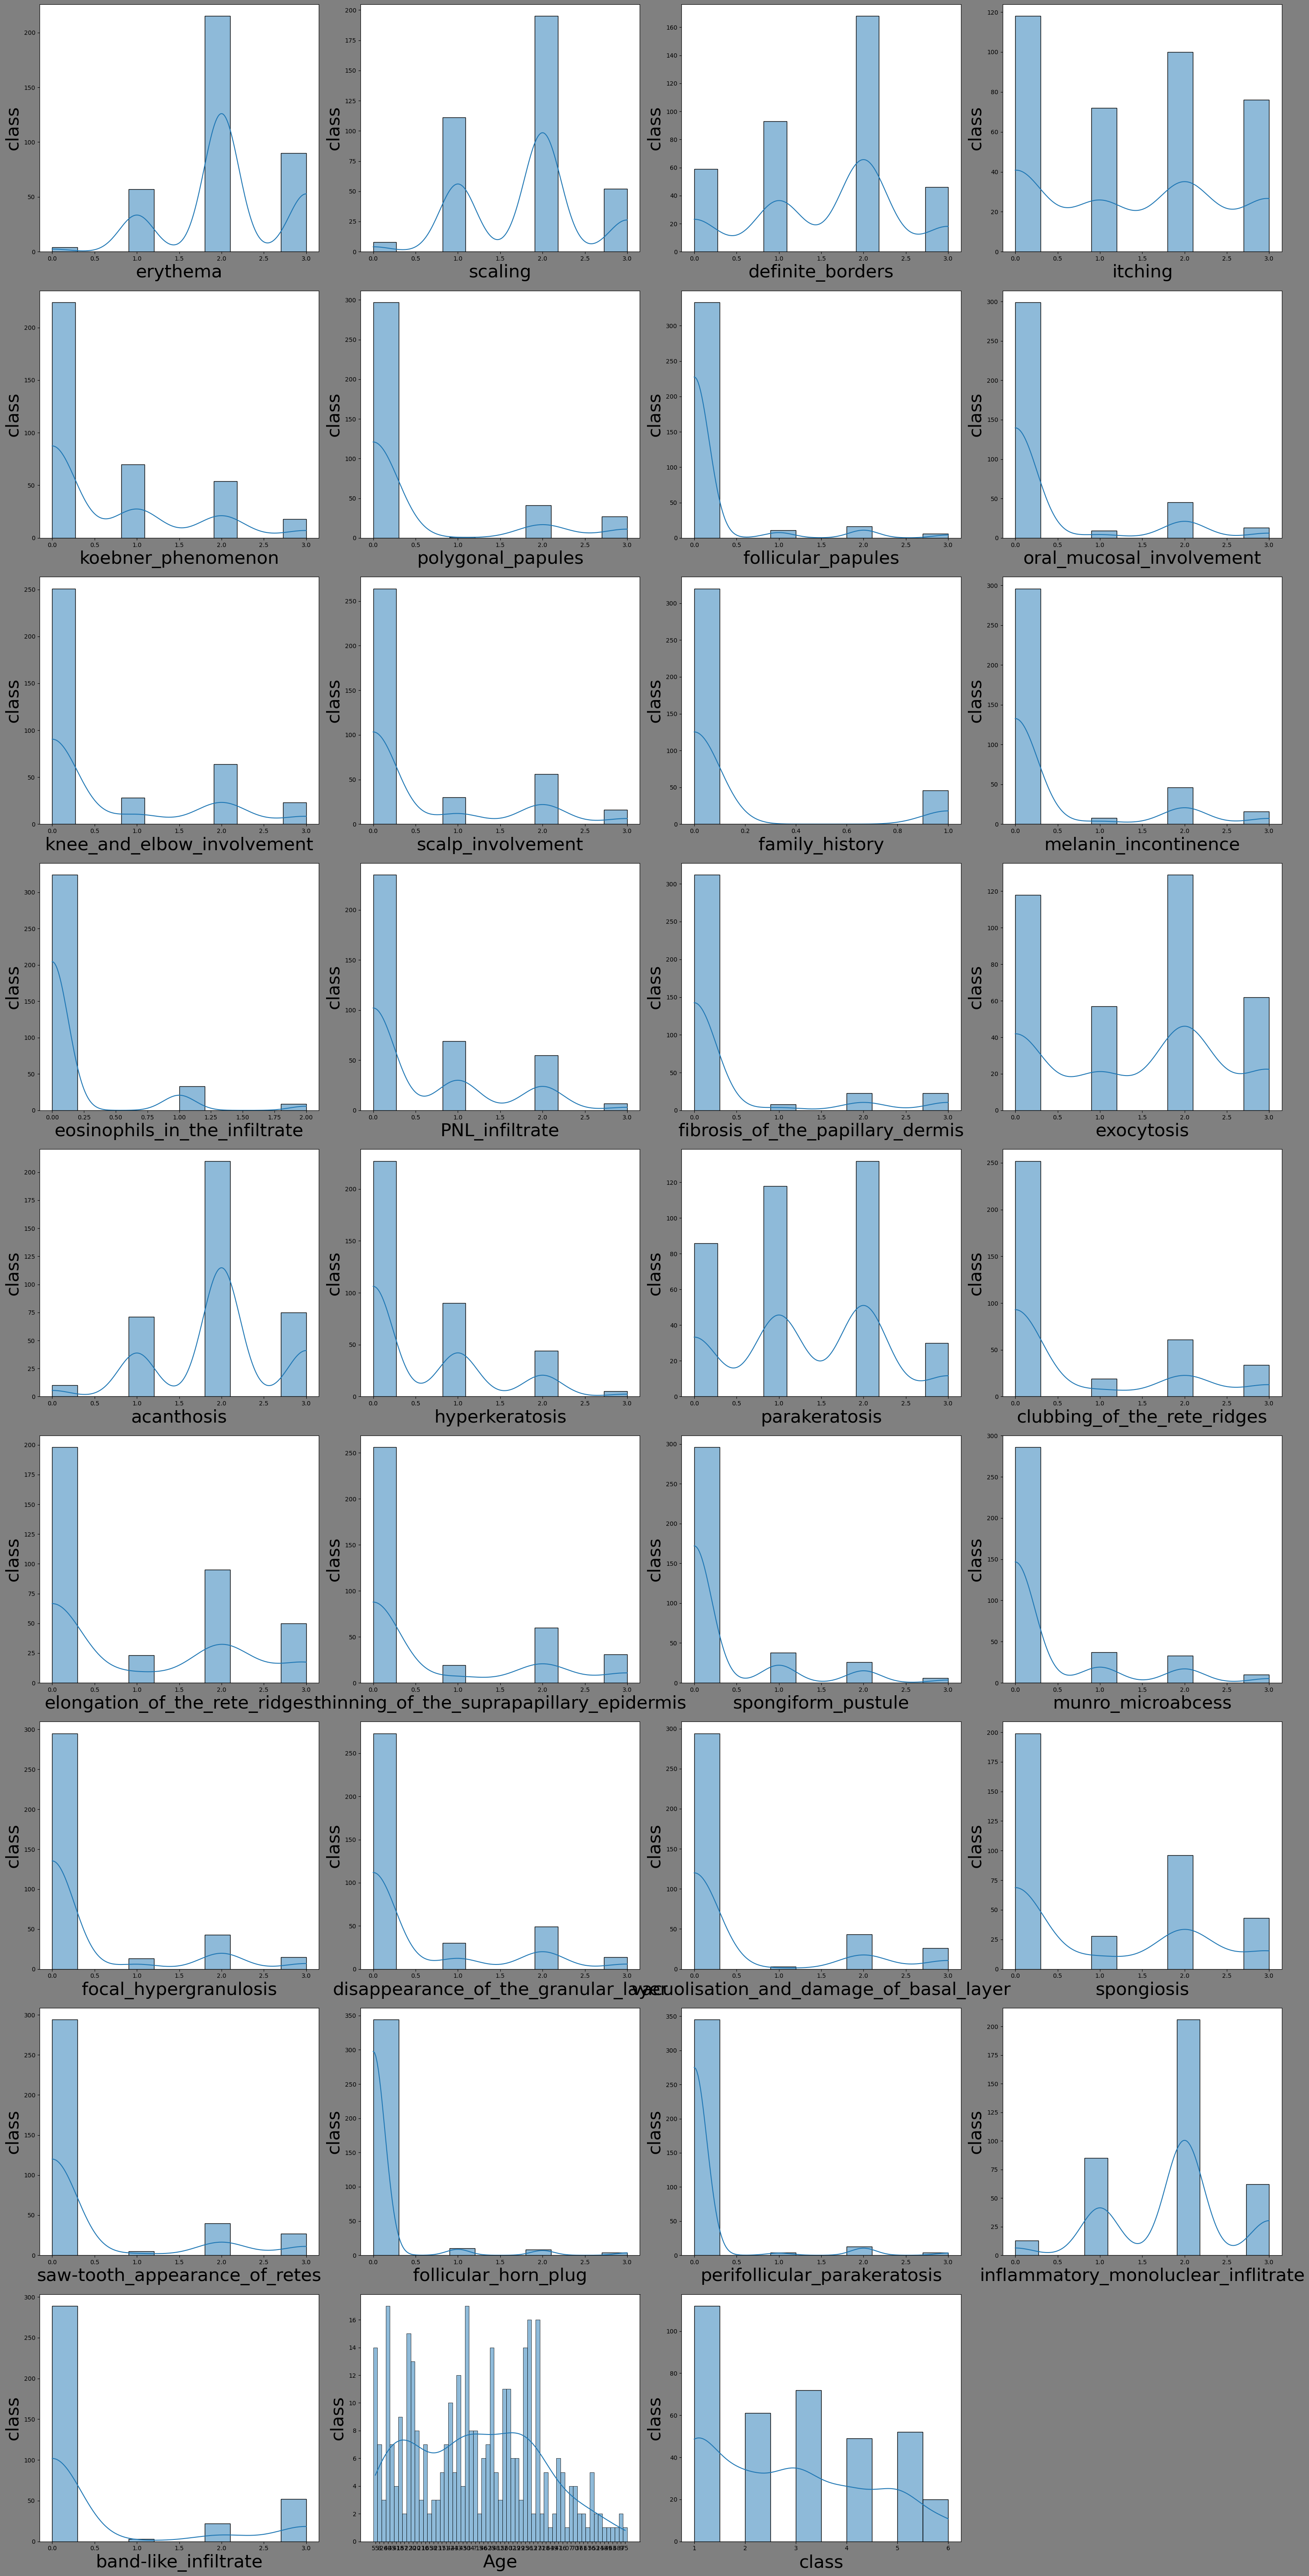

In [15]:
plt.figure(figsize=(30,60),facecolor='grey')
plotnumber=1

for i in data:
    if plotnumber<36:
        plot = plt.subplot(9,4,plotnumber)
        sns.histplot(x=data[i],kde=True)
        plt.xlabel(i,fontsize=30)
        plt.ylabel('class',fontsize=30)
    plotnumber+=1
plt.tight_layout()

- all columns in the given data does not follow normal distribution
- There are totally 6 types of skin diseases


<AxesSubplot:xlabel='class', ylabel='count'>

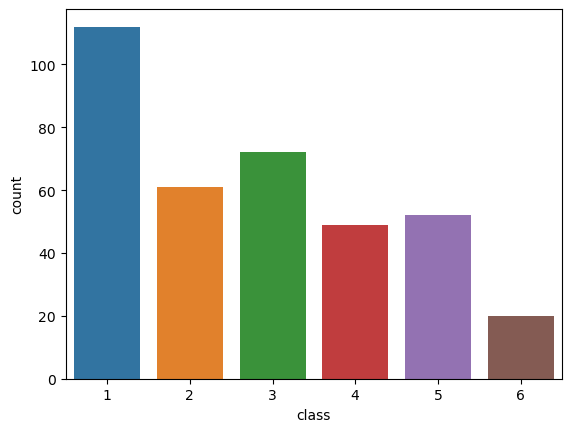

In [364]:
sns.countplot(x=data['class'],data=data)

- maximum members are from class 1 type of disease
- minimum people are from class 6 type of disease

## bivariate analysis

<AxesSubplot:xlabel='itching', ylabel='class'>

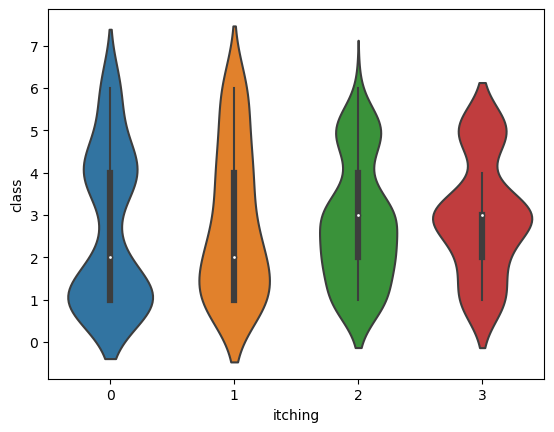

In [370]:
sns.violinplot(x='itching',y='class',data=data)

- people having itching levels from 1,2 and 3 are affected by classes 6 and 7 
- people having itching levels from 0 and 1 are affected by classes 7

<AxesSubplot:xlabel='Age', ylabel='class'>

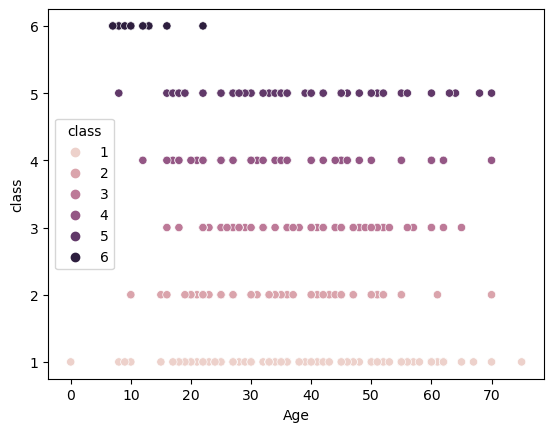

In [383]:
# plt.figure(figsize=(20,20))
sns.scatterplot(x='Age',y='class',data=data,hue='class',color='warm')

- people from age group of 15 to 30 have more occurence to skin diseases
- some people from age group 9 to 25 belong to class 6 type of skin disorder

## multivariate analysis

In [18]:
# sns.pairplot(data)

- Difficult to analyze in multivariate analysis

In [19]:
data.head(pd.set_option('display.max_rows',None))

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0           2        2                 0        3                   0   
1           3        3                 3        2                   1   
2           2        1                 2        3                   1   
3           2        2                 2        0                   0   
4           2        3                 2        2                   2   
5           2        3                 2        0                   0   
6           2        1                 0        2                   0   
7           2        2                 3        3                   3   
8           2        2                 1        0                   2   
9           2        2                 1        0                   1   
10          3        3                 2        1                   1   
11          2        2                 0        3                   0   
12          3        3                 1        2                   0   
13          2        3                 3        0                   0   
14          2        2                 3        3                   0   
15          1        1                 0        1                   3   
16          2        2                 1        3                   0   
17          3        3                 3        0                   0   
18          2        1                 3        3                   3   
19          1        1                 0        3                   0   
20          2        1                 1        2                   0   
21          3        2                 2        0                   0   
22          2        2                 0        2                   0   
23          2        2                 2        3                   2   
24          2        0                 0        3                   0   
25          2        1                 1        0                   1   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
32          2        3                 3        3                   3   
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
37          2        1                 1        1                   0   
38          2        1                 2        3                   2   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
43          2        1                 1        0                   0   
44          0        1                 0        3                   0   
45          2        1                 1        1                   1   
46          2        1                 1        3                   3   
47          2        1                 1        1                   0   
48          1        2                 1        1                   0   
49          2        0                 1        0                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
52          2        2                 1        0                   0   
53          3        1                 1        1              

In [20]:
data.Age.mode()

0    40
1    50
Name: Age, dtype: object

In [21]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [22]:
data.Age.value_counts()

40    17
50    17
36    16
27    16
22    15
35    14
25    14
55    14
30    13
33    12
60    11
52    11
42    10
18     9
?      8
34     8
20     8
51     7
45     7
62     7
8      7
10     7
19     6
32     6
47     6
46     6
17     5
44     5
16     5
28     5
56     5
48     5
70     4
43     4
7      4
41     4
12     3
29     3
23     3
26     3
38     3
21     3
57     2
9      2
24     2
53     2
61     2
13     2
37     2
65     2
39     2
31     2
15     2
0      1
67     1
64     1
58     1
49     1
63     1
68     1
75     1
Name: Age, dtype: int64

In [23]:
data.loc[data.Age=='?']

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
33          2        2                 1        0                   0   
34          2        1                 0        0                   2   
35          2        2                 1        2                   0   
36          2        1                 2        3                   2   
262         2        1                 0        2                   0   
263         1        1                 1        3                   0   
264         1        1                 0        2                   0   
265         1        1                 0        3                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
33                   0                   0                         0   
34                   0                   0                         0   
35                   0                   0                         0   
36                   3                   0                         2   
262                  0                   0                         0   
263                  0                   0                         0   
264                  0                   0                         0   
265                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
33                            1                  0               1   
34                            0                  0               0   
35                            0                  0               0   
36                            0                  0               1   
262                           0                  0               0   
263                           0                  0               0   
264                           1                  0               0   
265                           0                  0               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
33                      0                              0               2   
34                      0                              0               0   
35                      0                              0               2   
36                      1                              0               0   
262                     0                              0               0   
263                     0                              0               0   
264                     0                              0               0   
265                     0                              0               0   

     fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  hyperkeratosis  \
33                                  0           0           2               1   
34                                  0           2           1               1   
35                                  0           1           0               1   
36                                  0           2           1               1   
262                                 2           1           3               2   
263                                 3           2           3               1   
264                                 3           2           3               2   
265                                 2           1           3               1   

     parakeratosis  clubbing_of_the_rete_ridges  \
33               2                            2   
34               1                            0   
35               0                            0   
36               2                            0   
262              2                            1   
263              2                            2   
264              1                            1   
265              1                            0   

     elongation_of_the_rete_ridges  thinning_of_the_suprapapillary_epidermis  \
33                               1                                         2   
34                              

In [24]:
data.Age.mode()

0    40
1    50
Name: Age, dtype: object

In [25]:
data.loc[data['Age']=='?','Age']='45'

In [26]:
data.Age.unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '15', '46', '62', '35', '48', '12', '52', '60', '32',
       '19', '29', '25', '36', '13', '27', '31', '28', '64', '39', '47',
       '16', '0', '7', '70', '37', '61', '67', '56', '53', '24', '58',
       '49', '63', '68', '9', '75'], dtype=object)

In [27]:
data.Age.isna()
data.loc[data.Age.isna()]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

In [28]:
data.Age=data.Age.astype('int64')
# sns.boxplot(x='age',y='class')

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   polygonal_papules                         366 non-null    int64
 6   follicular_papules                        366 non-null    int64
 7   oral_mucosal_involvement                  366 non-null    int64
 8   knee_and_elbow_involvement                366 non-null    int64
 9   scalp_involvement                         366 non-null    int64
 10  family_history                            366 non-null    int6

<AxesSubplot:xlabel='Age', ylabel='class'>

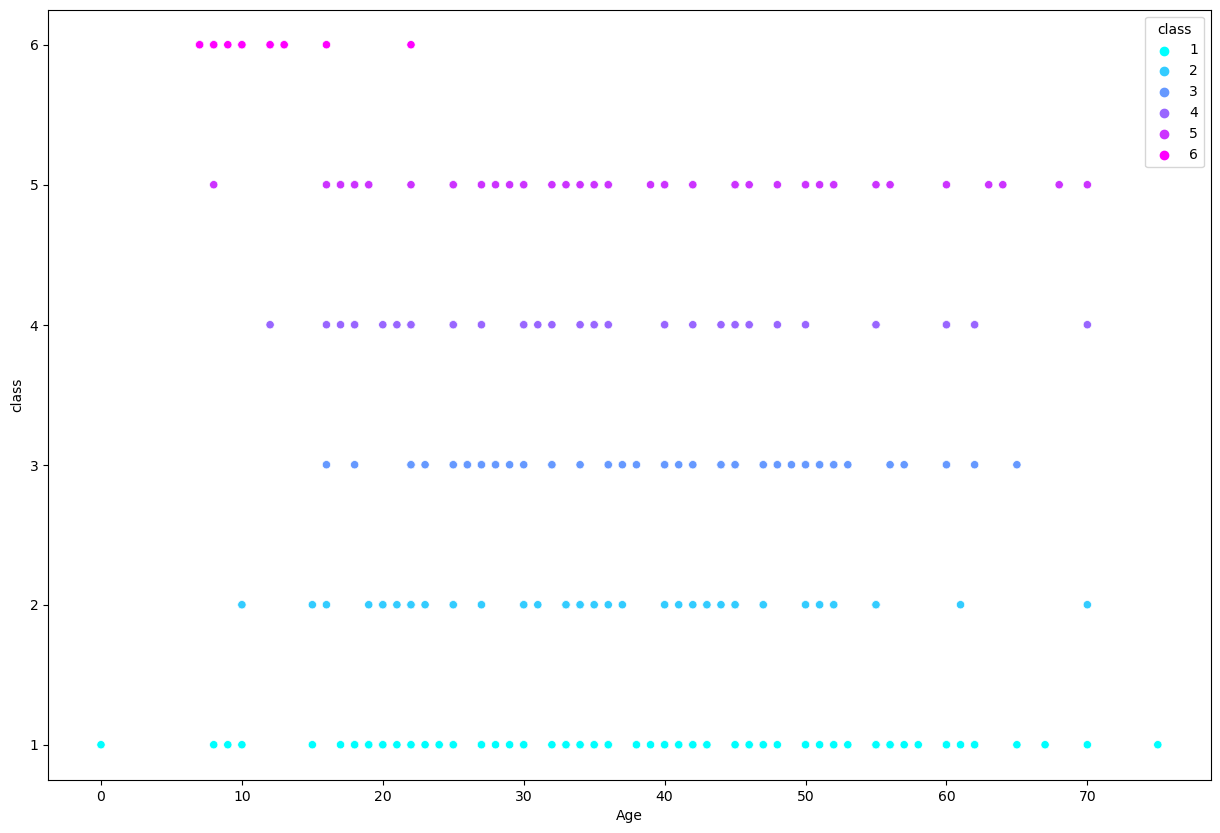

In [30]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Age',y='class',hue='class',data=data,palette='cool')

In [31]:
data.describe()

erythema     scaling  definite_borders     itching  \
count  366.000000  366.000000        366.000000  366.000000   
mean     2.068306    1.795082          1.549180    1.366120   
std      0.664753    0.701527          0.907525    1.138299   
min      0.000000    0.000000          0.000000    0.000000   
25%      2.000000    1.000000          1.000000    0.000000   
50%      2.000000    2.000000          2.000000    1.000000   
75%      2.000000    2.000000          2.000000    2.000000   
max      3.000000    3.000000          3.000000    3.000000   

       koebner_phenomenon  polygonal_papules  follicular_papules  \
count          366.000000         366.000000          366.000000   
mean             0.633880           0.448087            0.166667   
std              0.908016           0.957327            0.570588   
min              0.000000           0.000000            0.000000   
25%              0.000000           0.000000            0.000000   
50%              0.000000           0.000000            0.000000   
75%              1.000000           0.000000            0.000000   
max              3.000000           3.000000            3.000000   

       oral_mucosal_involvement  knee_and_elbow_involvement  \
count                366.000000                  366.000000   
mean                   0.377049                    0.614754   
std                    0.834147                    0.982979   
min                    0.000000                    0.000000   
25%                    0.000000                    0.000000   
50%                    0.000000                    0.000000   
75%                    0.000000                    1.000000   
max                    3.000000                    3.000000   

       scalp_involvement  family_history  melanin_incontinence  \
count         366.000000      366.000000            366.000000   
mean            0.519126        0.125683              0.404372   
std             0.905639        0.331946              0.869818   
min             0.000000        0.000000              0.000000   
25%             0.000000        0.000000              0.000000   
50%             0.000000        0.000000              0.000000   
75%             1.000000        0.000000              0.000000   
max             3.000000        1.000000              3.000000   

       eosinophils_in_the_infiltrate  PNL_infiltrate  \
count                     366.000000      366.000000   
mean                        0.139344        0.546448   
std                         0.411790        0.815451   
min                         0.000000        0.000000   
25%                         0.000000        0.000000   
50%                         0.000000        0.000000   
75%                         0.000000        1.000000   
max                         2.000000        3.000000   

       fibrosis_of_the_papillary_dermis  exocytosis  acanthosis  \
count                        366.000000  366.000000  366.000000   
mean                           0.336066    1.368852    1.956284   
std                            0.853139    1.104418    0.712512   
min                            0.000000    0.000000    0.000000   
25%                            0.000000    0.000000    2.000000   
50%                            0.000000    2.000000    2.000000   
75%                            0.000000    2.000000    2.000000   
max                            3.000000    3.000000    3.000000   

       hyperkeratosis  parakeratosis  clubbing_of_the_rete_ridges  \
count      366.000000     366.000000                   366.000000   
mean         0.527322       1.289617                     0.663934   
std          0.757116       0.917562                     1.056829   
min          0.000000       0.000000                     0.000000   
25%          0.000000       1.000000                     0.000000   
50%          0.000000       1.000000                     0.000000   
75%          1.000000       2.000000                     2.000000   
max 

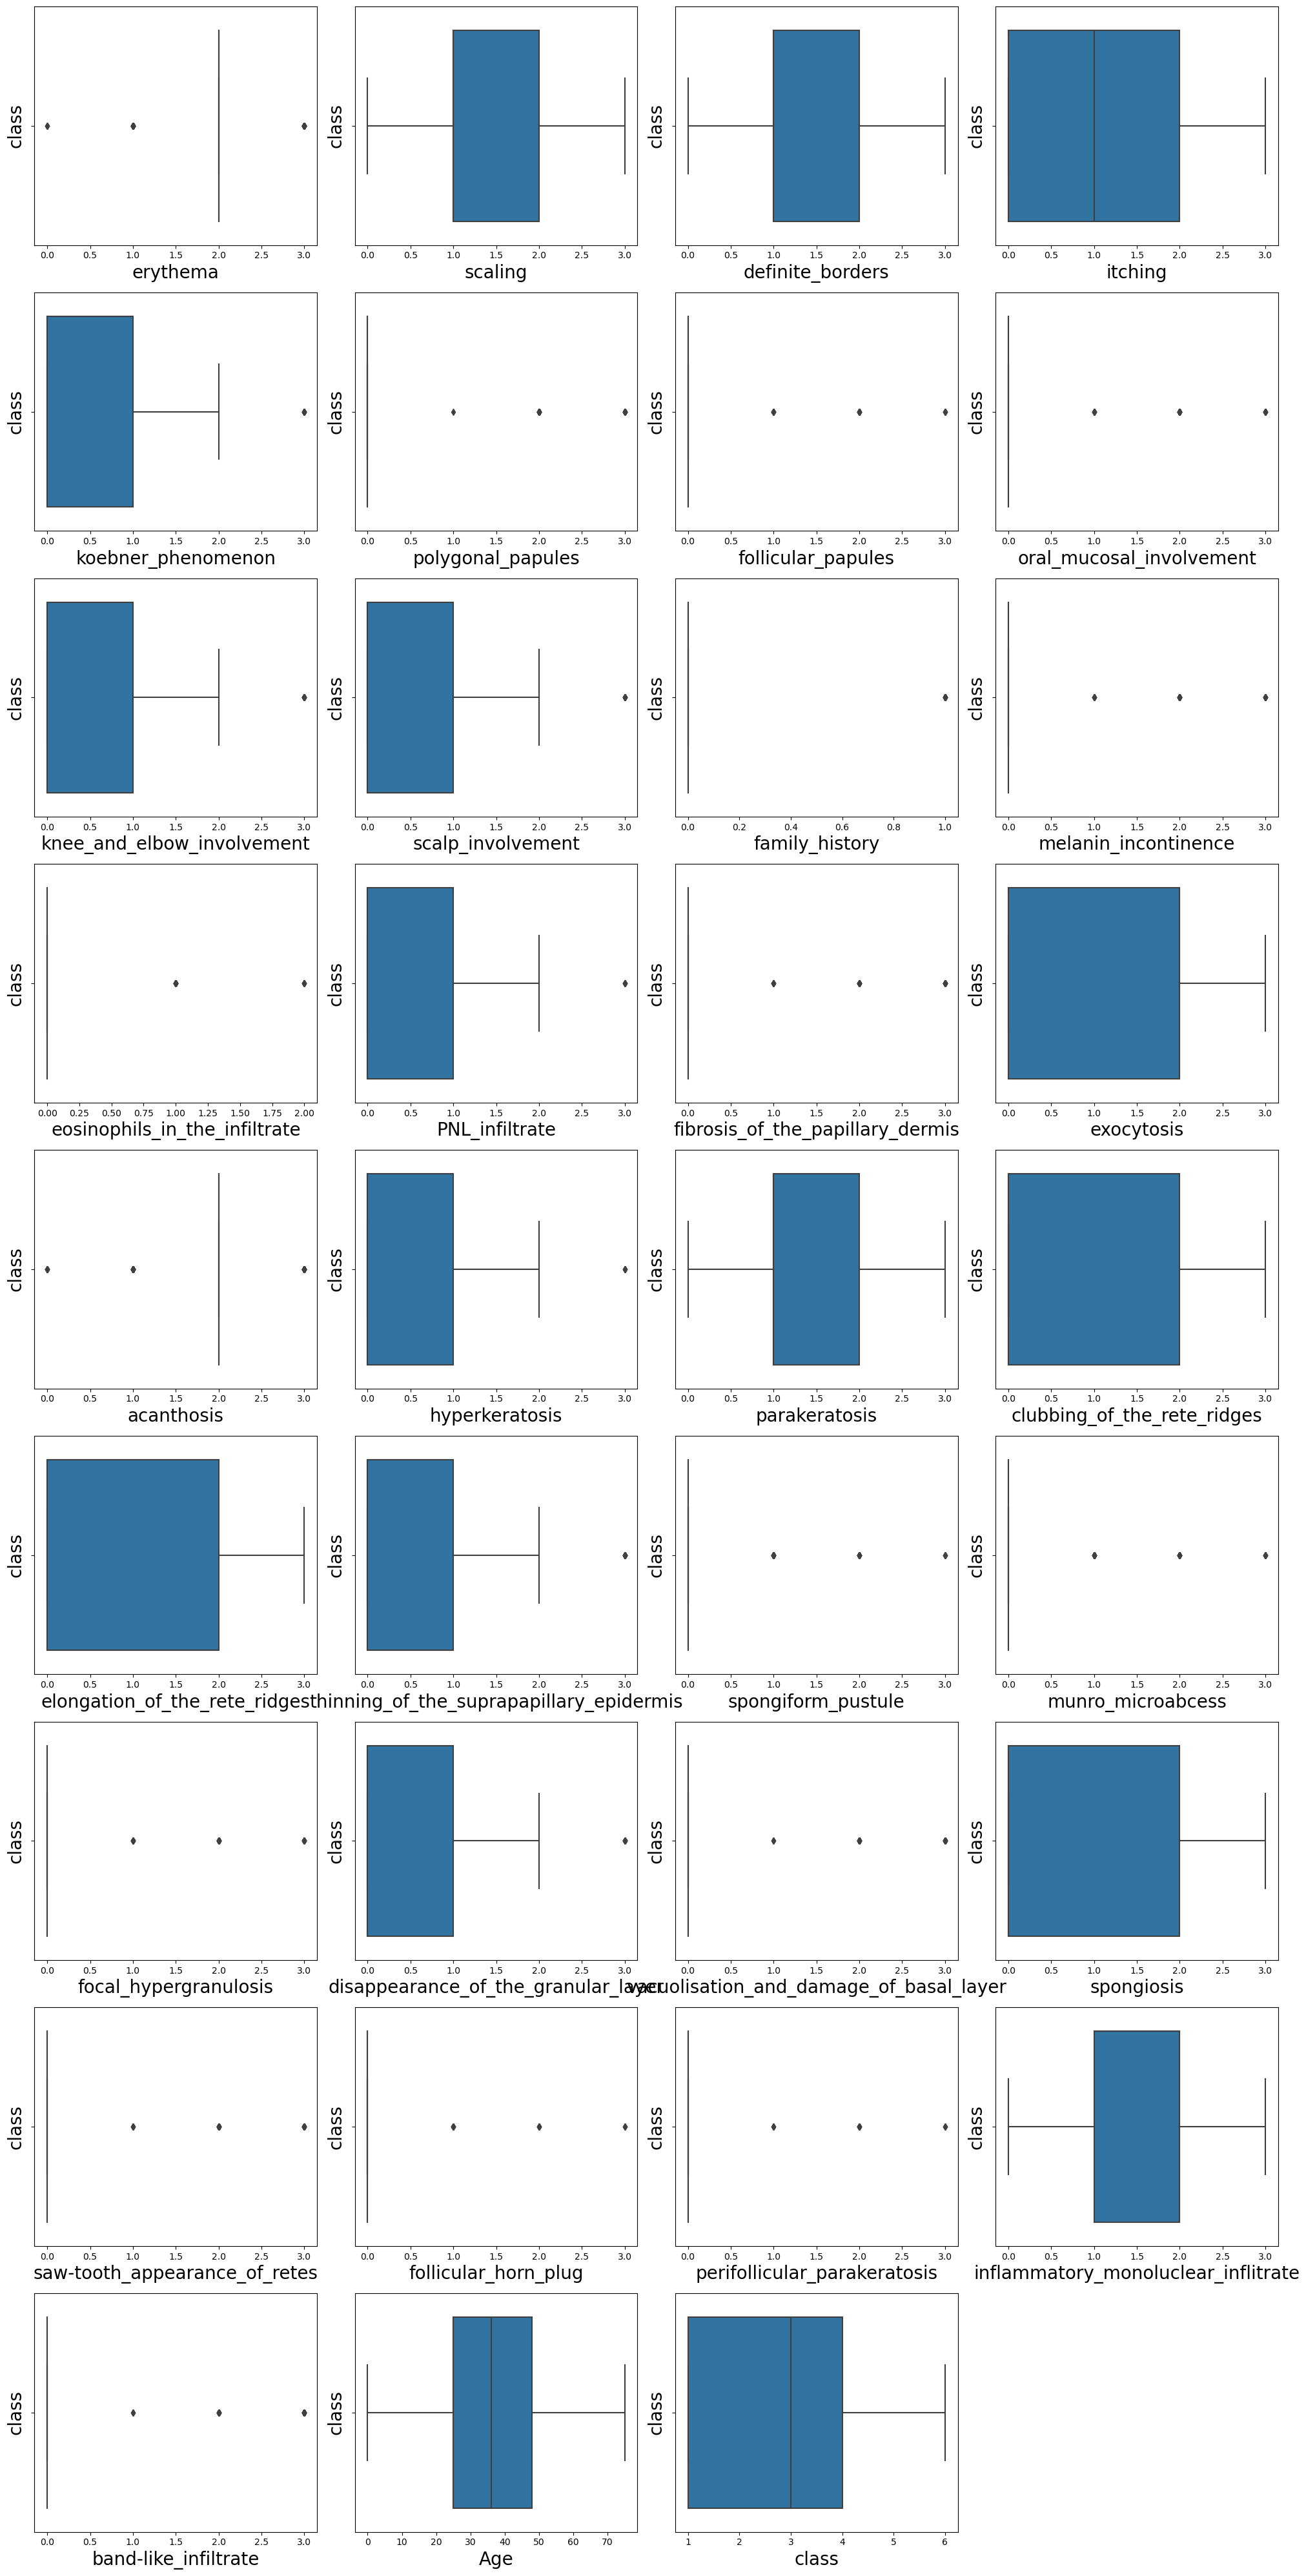

In [32]:
plt.figure(figsize=(20,40))
plotnumber=1

for i in data:
    if plotnumber<36:
        plot = plt.subplot(9,4,plotnumber)
        sns.boxplot(x = data[i])
        plt.xlabel(i,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

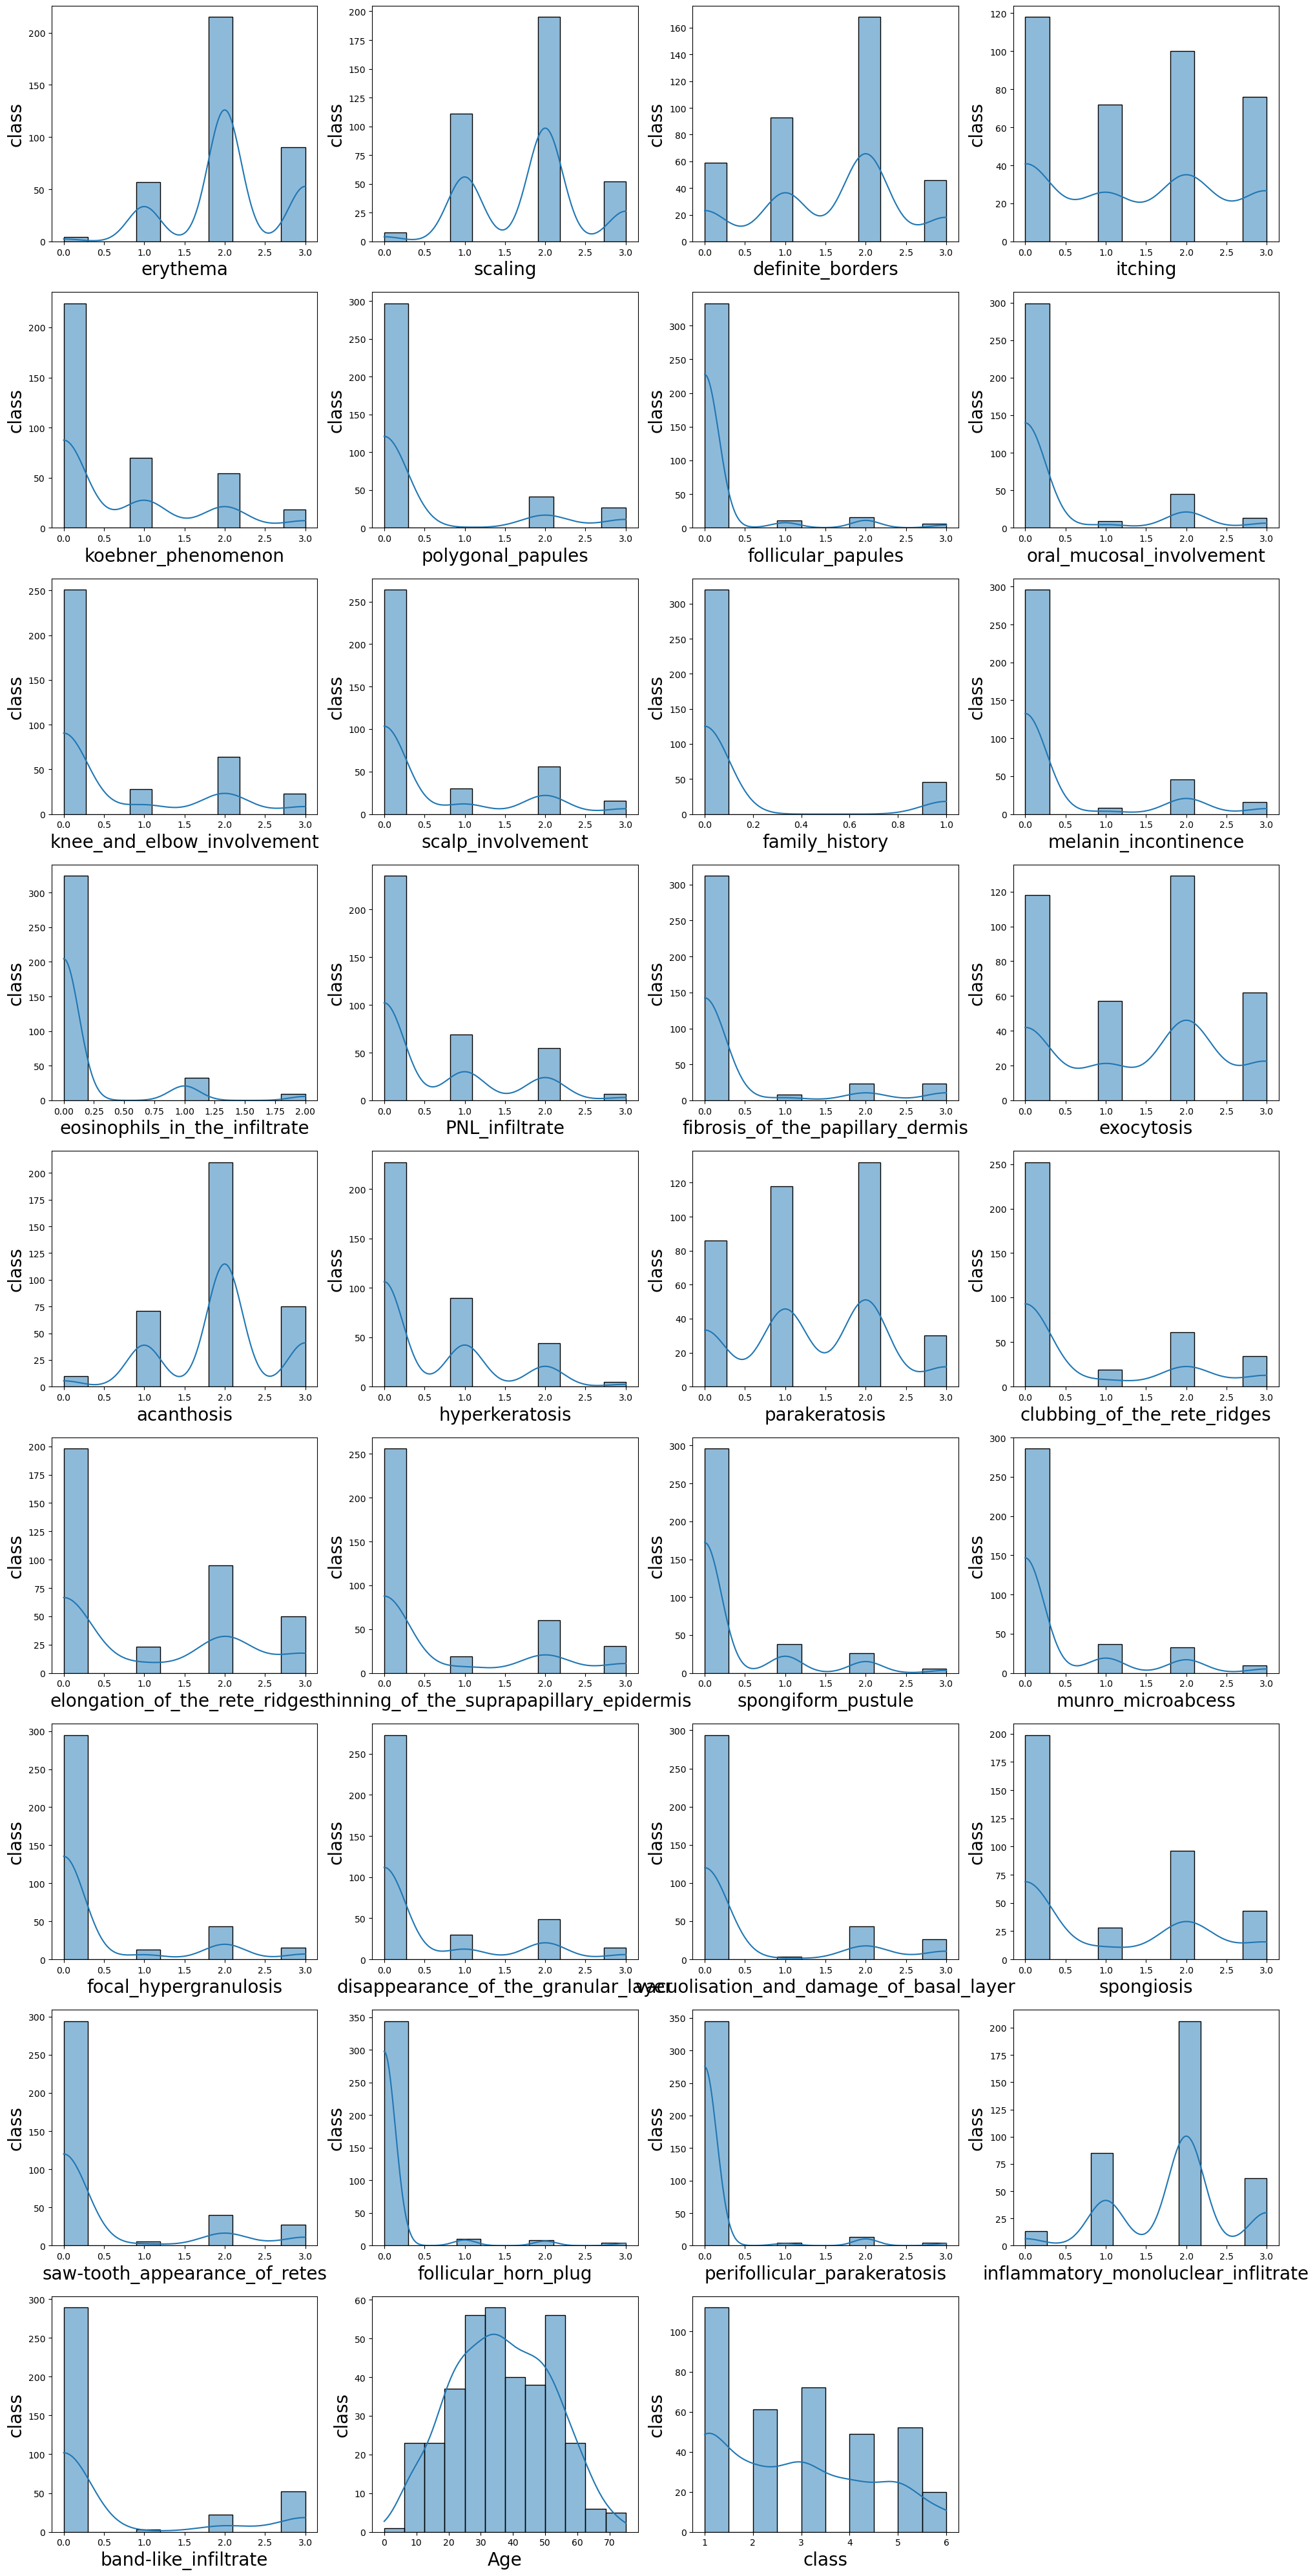

In [33]:
plt.figure(figsize=(20,40))
plotnumber=1

for i in data:
    if plotnumber<36:
        plot = plt.subplot(9,4,plotnumber)
        sns.histplot(x = data[i],kde=True)
        plt.xlabel(i,fontsize=20)
        plt.ylabel('class',fontsize=20)
    plotnumber+=1
plt.tight_layout()

## erythema

<AxesSubplot:>

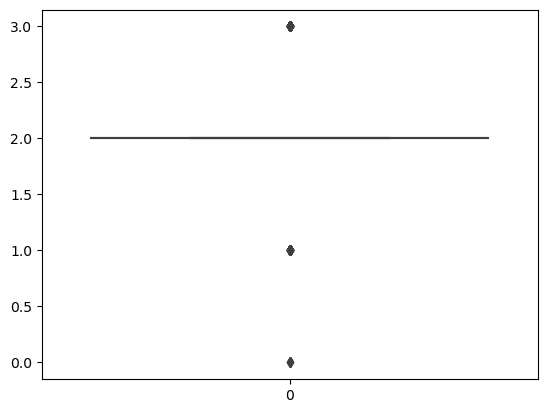

In [34]:
sns.boxplot(data['erythema'])

In [35]:
IQR=stats.iqr(data.erythema,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.erythema.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.erythema.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  2.0
Q3 :  2.0
Lower_limit :  2.0
Upper_limit :  2.0


In [36]:
data.loc[(data['erythema']<Lower_limit) | (data['erythema']>Upper_limit)]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
1           3        3                 3        2                   1   
10          3        3                 2        1                   1   
12          3        3                 1        2                   0   
15          1        1                 0        1                   3   
17          3        3                 3        0                   0   
19          1        1                 0        3                   0   
21          3        2                 2        0                   0   
26          1        1                 0        1                   0   
27          1        2                 2        3                   0   
28          3        2                 2        2                   0   
29          1        1                 2        3                   2   
30          3        2                 1        2                   0   
31          3        2                 0        2                   0   
39          3        3                 2        0                   0   
40          1        1                 1        0                   0   
41          1        1                 1        0                   0   
42          3        2                 1        1                   0   
44          0        1                 0        3                   0   
48          1        2                 1        1                   0   
50          3        1                 1        2                   2   
51          1        1                 1        0                   2   
53          3        1                 1        1                   1   
54          0        1                 0        2                   0   
56          1        1                 1        2                   0   
58          1        1                 1        0                   0   
59          3        3                 0        3                   0   
62          1        1                 0        1                   0   
63          3        3                 2        1                   1   
65          3        2                 2        2                   0   
67          1        1                 0        1                   3   
68          3        3                 3        2                   0   
69          3        3                 3        0                   1   
72          1        1                 1        1                   1   
73          1        1                 1        1                   0   
75          3        2                 1        2                   0   
78          0        0                 0        0                   0   
80          3        2                 2        2                   2   
81          3        2                 2        2                   0   
83          3        2                 2        1                   0   
84          1        1                 2        3                   0   
86          3        3                 2        2                   1   
88          0        1                 2        1                   1   
89          1        1                 1        0                   2   
90          3        2                 1        3                   0   
92          1        1                 1        3                   0   
93          3        3                 3        3                   3   
97          1        1                 1        0                   0   
101         1        1                 2        0                   0   
102         3        3                 3        2                   2   
104         1        2                 2        1                   0   
106         1        1                 0        1                   1   
107         1        1                 1        1                   1   
109         3        2                 1        2                   2   
112         1        1                 2        0              

In [37]:
data.loc[(data['erythema']<Lower_limit) | (data['erythema']>Upper_limit)].shape

(151, 35)

In [38]:
151/366

0.412568306010929

- 41.3% outliers in the erythema column of the given dataset

## scaling

<AxesSubplot:>

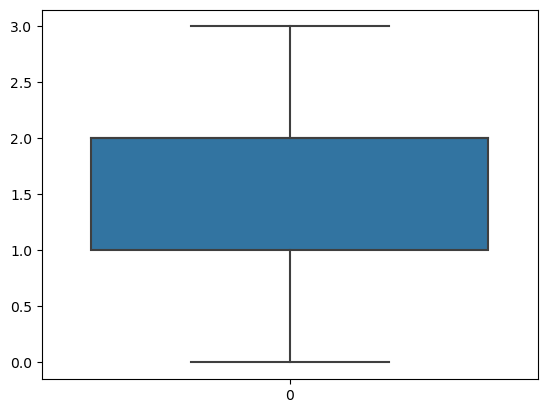

In [39]:
sns.boxplot(data['scaling'])

In [40]:
IQR=stats.iqr(data.scaling,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.scaling.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.scaling.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_limit :  -0.5
Upper_limit :  3.5


In [41]:
data.loc[data.scaling<Lower_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

In [42]:
data.loc[data.scaling>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

- no outliers in scaling column

## definite borders

<AxesSubplot:>

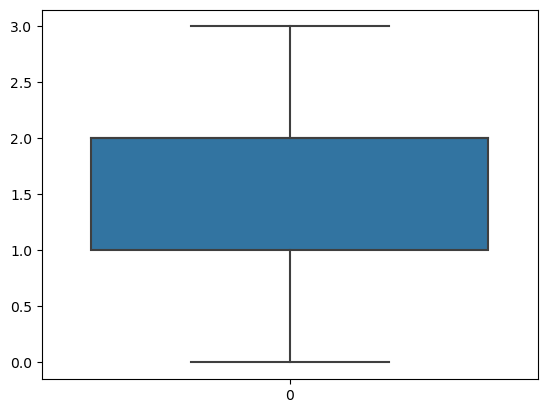

In [43]:
sns.boxplot(data['definite_borders'])

In [44]:
IQR=stats.iqr(data.definite_borders,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.definite_borders.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.definite_borders.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_limit :  -0.5
Upper_limit :  3.5


In [45]:
data.loc[data.definite_borders<Lower_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

In [46]:
data.loc[data.definite_borders>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

- no ouliers in definite_borders column

## itching

<AxesSubplot:>

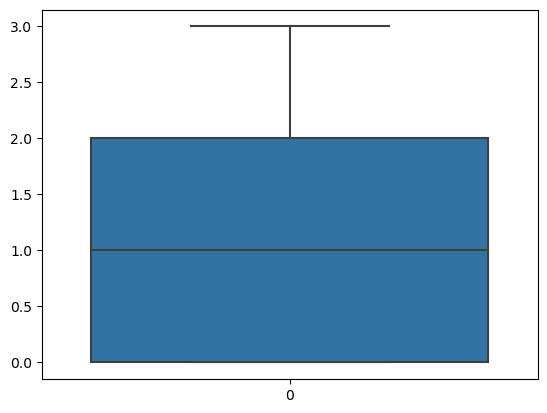

In [47]:
sns.boxplot(data['itching'])

In [48]:
IQR = stats.iqr(data.itching,interpolation='midpoint')
print('IQR: ',IQR)
Q1 = data.itching.quantile(0.25)
print('Q1 :', Q1)
Q2 = data.itching.quantile(0.75)
print('Q2 :', Q2)

Lower_limit = Q2 - 1.5*IQR
print('Lower limit :', Lower_limit)

Upper_limit = Q1 +1.5*IQR
print('Upper limit:', Upper_limit)

IQR:  2.0
Q1 : 0.0
Q2 : 2.0
Lower limit : -1.0
Upper limit: 3.0


- no outliers in itching column

### koebner_phenomenon

<AxesSubplot:xlabel='koebner_phenomenon'>

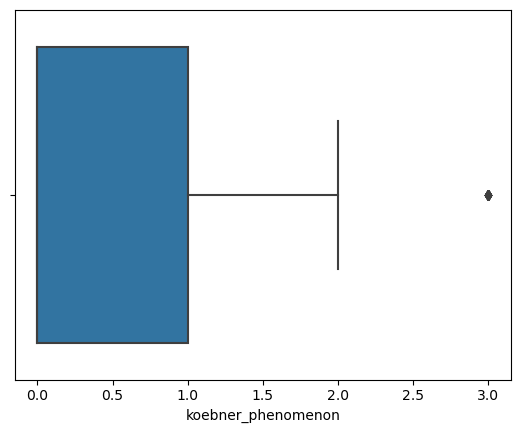

In [49]:
sns.boxplot(x= data['koebner_phenomenon'])

In [50]:
IQR=stats.iqr(data.koebner_phenomenon,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.koebner_phenomenon.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.koebner_phenomenon.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [51]:
data.koebner_phenomenon.value_counts()

0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64

In [52]:
data.loc[data.koebner_phenomenon>Upper_limit].shape

(18, 35)

In [53]:
18/366*100


4.918032786885246

In [54]:
data.loc[data.koebner_phenomenon<Lower_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

In [55]:
data.loc[data.koebner_phenomenon>Upper_limit,'koebner_phenomenon']= data.koebner_phenomenon.median()

In [56]:
# outliers handled in koebner_phenomenon column
data.loc[data.koebner_phenomenon>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

## polygonal pauples

<AxesSubplot:xlabel='polygonal_papules'>

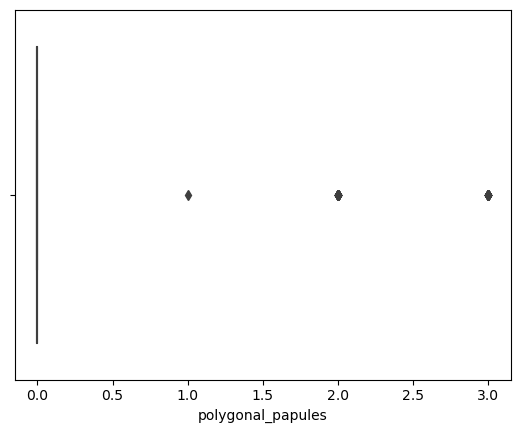

In [57]:
sns.boxplot(x='polygonal_papules',data=data)

In [58]:
IQR=stats.iqr(data.polygonal_papules,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.polygonal_papules.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.polygonal_papules.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [59]:
data.loc[data.polygonal_papules<Lower_limit].shape

(0, 35)

In [60]:
data.loc[data.polygonal_papules>Upper_limit].shape

(69, 35)

In [61]:
69/366

0.1885245901639344

- 19% of polygonal_papules have outliers 

## follicular_papules

<AxesSubplot:xlabel='follicular_papules'>

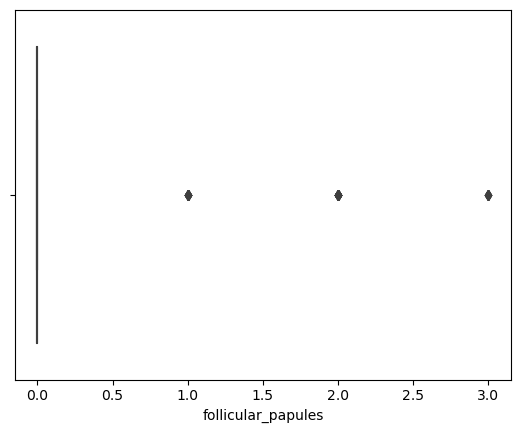

In [62]:
sns.boxplot(x=data.follicular_papules)

In [63]:
IQR=stats.iqr(data.follicular_papules,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.follicular_papules.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.follicular_papules.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [64]:
data.loc[data.follicular_papules>Upper_limit].shape

(33, 35)

In [65]:
33/336

0.09821428571428571

In [66]:
0.09821428571428571*100

9.821428571428571

- 9% outliers in follicular_papules column

## oral_mucosal_involvement

<AxesSubplot:xlabel='oral_mucosal_involvement'>

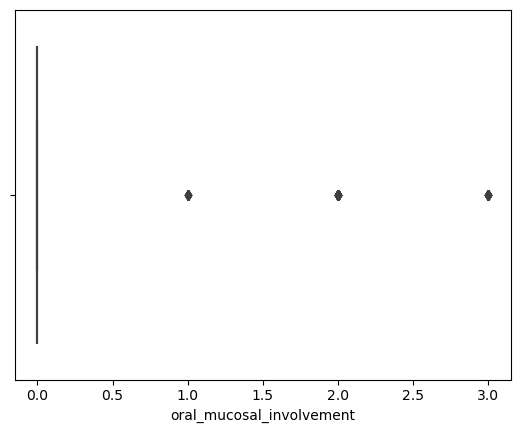

In [67]:
sns.boxplot(x=data['oral_mucosal_involvement'])

In [68]:
IQR=stats.iqr(data.oral_mucosal_involvement,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.oral_mucosal_involvement.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.oral_mucosal_involvement.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [69]:
data.loc[data.oral_mucosal_involvement<Lower_limit].shape

(0, 35)

In [70]:
data.loc[data['oral_mucosal_involvement']>Upper_limit].shape

(67, 35)

In [71]:
67/336

0.19940476190476192

- 19% outliers in oral_mucosal_involvement column

## knee_and_elbow_involvement

<AxesSubplot:>

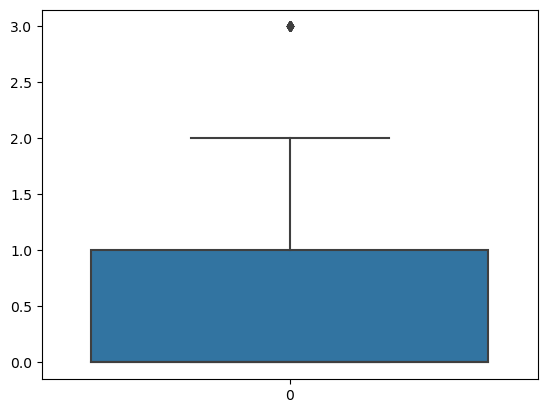

In [72]:
sns.boxplot(data['knee_and_elbow_involvement'])

In [73]:
IQR=stats.iqr(data.knee_and_elbow_involvement,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.knee_and_elbow_involvement.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.knee_and_elbow_involvement.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [74]:
data.loc[data['knee_and_elbow_involvement']<Lower_limit].shape

(0, 35)

In [75]:
data.loc[data['knee_and_elbow_involvement']>Upper_limit].shape

(23, 35)

In [76]:
23/366*100

6.284153005464481

- 6.3% of outliers in knee_and_elbow_involvement

## scalp_involvement

<AxesSubplot:xlabel='scalp_involvement'>

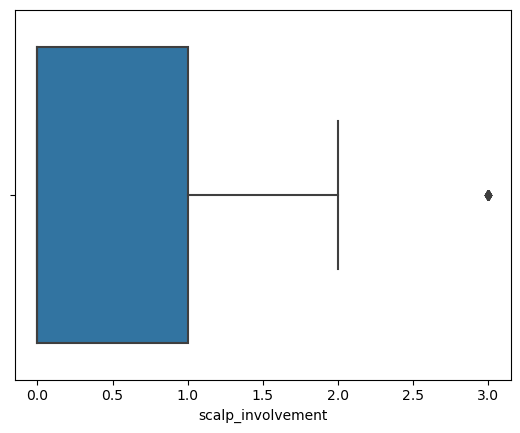

In [77]:
sns.boxplot(x =data.scalp_involvement)

In [78]:
IQR=stats.iqr(data.scalp_involvement,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.scalp_involvement.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.scalp_involvement.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [79]:
data.loc[data['scalp_involvement']<Lower_limit].shape

(0, 35)

In [80]:
data.loc[data['scalp_involvement']>Upper_limit].shape

(16, 35)

In [81]:
86/366*100

23.497267759562842

In [82]:
data.loc[data['scalp_involvement']>Upper_limit]

erythema  scaling  definite_borders  itching  koebner_phenomenon  \
17          3        3                 3        0                   0   
32          2        3                 3        3                   0   
88          0        1                 2        1                   1   
93          3        3                 3        3                   0   
110         2        2                 2        3                   2   
124         3        2                 2        2                   2   
135         1        1                 1        1                   1   
194         3        2                 2        0                   0   
206         2        3                 2        0                   1   
208         2        3                 2        0                   0   
245         3        3                 3        0                   0   
246         2        2                 2        0                   0   
304         3        1                 2        1                   0   
351         2        2                 2        3                   2   
352         3        2                 2        3                   2   
365         3        2                 2        0                   0   

     polygonal_papules  follicular_papules  oral_mucosal_involvement  \
17                   0                   0                         0   
32                   0                   0                         0   
88                   0                   1                         0   
93                   0                   0                         0   
110                  0                   0                         0   
124                  0                   0                         0   
135                  0                   1                         0   
194                  0                   0                         0   
206                  0                   0                         0   
208                  0                   0                         0   
245                  0                   0                         0   
246                  0                   0                         0   
304                  0                   0                         0   
351                  0                   0                         0   
352                  0                   0                         0   
365                  0                   0                         0   

     knee_and_elbow_involvement  scalp_involvement  family_history  \
17                            3                  3               1   
32                            3                  3               0   
88                            2                  3               0   
93                            3                  3               1   
110                           3                  3               0   
124                           0                  3               0   
135                           2                  3               0   
194                           3                  3               1   
206                           2                  3               0   
208                           2                  3               0   
245                           2                  3               0   
246                           2                  3               0   
304                           2                  3               0   
351                           2                  3               1   
352                           2                  3               0   
365                           3                  3               0   

     melanin_incontinence  eosinophils_in_the_infiltrate  PNL_infiltrate  \
17                      0                              0               2   
32                      0                              0               0   
88                      0                              0               1   
93                      0                  

- 23% outliers in scalp_involvement column

## family_history

<AxesSubplot:xlabel='family_history'>

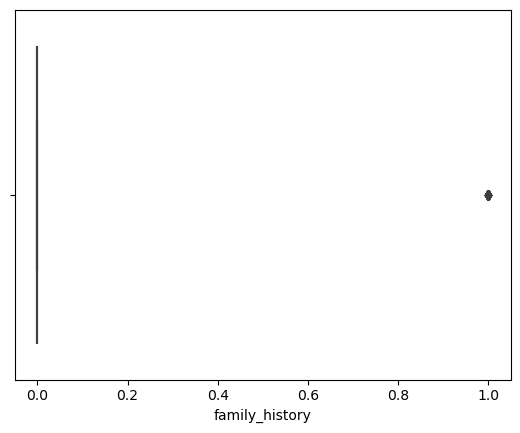

In [83]:
sns.boxplot(x=data.family_history)

In [84]:
IQR=stats.iqr(data.family_history,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.family_history.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.family_history.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [85]:
data.loc[data['family_history']>Upper_limit].shape

(46, 35)

In [86]:
46/366

0.12568306010928962

- 12.5% outliers in family_history

## melanin_incontinence

<AxesSubplot:xlabel='melanin_incontinence'>

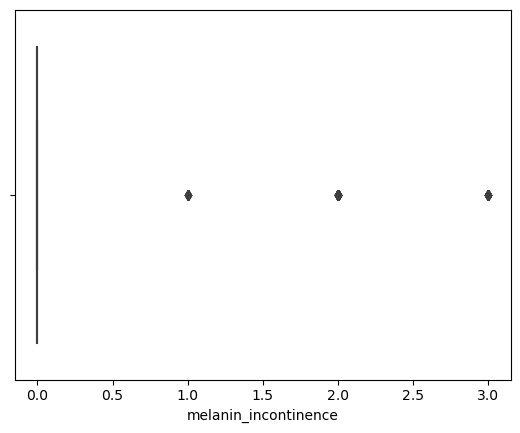

In [87]:
sns.boxplot(x =data.melanin_incontinence)

In [88]:
IQR=stats.iqr(data.melanin_incontinence,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.melanin_incontinence.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.melanin_incontinence.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [89]:
data.loc[data['melanin_incontinence']>Upper_limit].shape

(70, 35)

In [90]:
70/366

0.1912568306010929

- 19% outliers in melanin_incontinence

## eosinophils_in_the_infiltrate

<AxesSubplot:xlabel='eosinophils_in_the_infiltrate'>

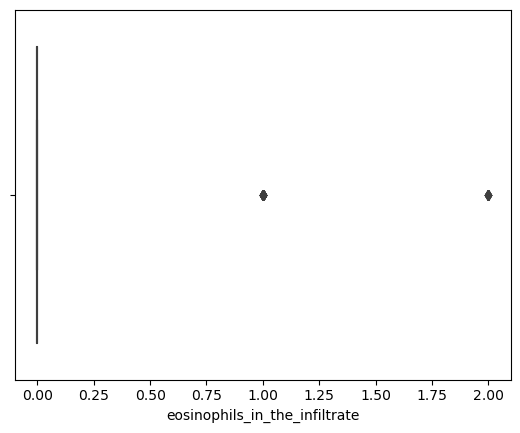

In [91]:
sns.boxplot(x=data.eosinophils_in_the_infiltrate)

In [92]:
IQR=stats.iqr(data.eosinophils_in_the_infiltrate,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.eosinophils_in_the_infiltrate.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.eosinophils_in_the_infiltrate.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [93]:
data.loc[data['eosinophils_in_the_infiltrate']>Upper_limit].shape

(42, 35)

In [94]:
42/366*100

11.475409836065573

- 11.5% outliers in eosinophils_in_the_infiltrate

## PNL_infiltrate

<AxesSubplot:xlabel='PNL_infiltrate'>

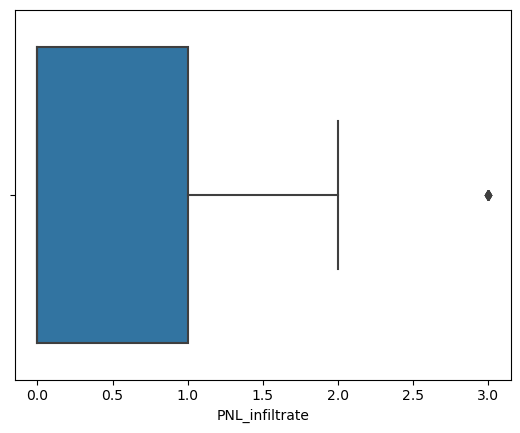

In [95]:
sns.boxplot(x=data.PNL_infiltrate)

In [96]:
IQR=stats.iqr(data.PNL_infiltrate,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.PNL_infiltrate.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.PNL_infiltrate.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [97]:
data.loc[data.PNL_infiltrate<Lower_limit].shape

(0, 35)

In [98]:
data.loc[data.PNL_infiltrate>Upper_limit].shape

(7, 35)

In [99]:
7/366*100

1.912568306010929

In [100]:

data.loc[data.PNL_infiltrate<Lower_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

In [101]:
data.loc[data.PNL_infiltrate>Upper_limit,'PNL_infiltrate']= data.PNL_infiltrate.median()

In [102]:
# outliers handled in PNL_infiltrate column
data.loc[data.PNL_infiltrate>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

## eosinophils_in_the_infiltrate

In [103]:
data.loc[data['eosinophils_in_the_infiltrate']>Upper_limit,'eosinophils_in_the_infiltrate']= data['eosinophils_in_the_infiltrate'].median()

In [104]:
# outlier handled for eosinophils_in_the_infiltrate column
data.loc[data['eosinophils_in_the_infiltrate']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

## fibrosis_of_the_papillary_dermis

<AxesSubplot:xlabel='fibrosis_of_the_papillary_dermis'>

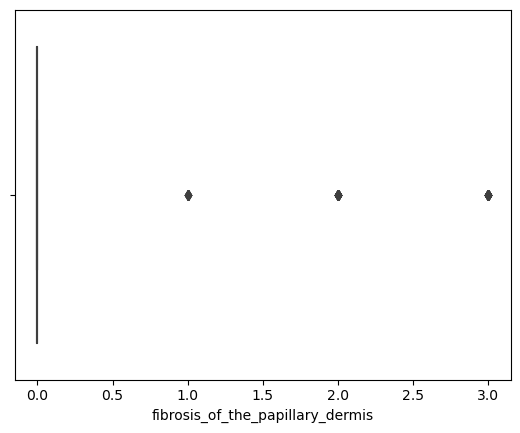

In [105]:
sns.boxplot(x=data.fibrosis_of_the_papillary_dermis)

In [106]:
IQR=stats.iqr(data.fibrosis_of_the_papillary_dermis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.fibrosis_of_the_papillary_dermis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.fibrosis_of_the_papillary_dermis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [107]:
data.loc[data['fibrosis_of_the_papillary_dermis']>Upper_limit].shape

(54, 35)

In [108]:
54/366

0.14754098360655737

- 14.7% outliers in fibrosis_of_the_papillary_dermis column

## exocytosis

<AxesSubplot:xlabel='exocytosis'>

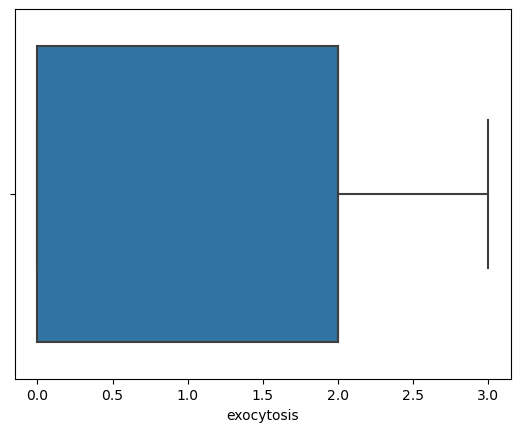

In [109]:
sns.boxplot(x=data.exocytosis)

In [110]:
IQR=stats.iqr(data.exocytosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.exocytosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.exocytosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  0.0
Q3 :  2.0
Lower_limit :  -3.0
Upper_limit :  5.0


In [111]:
data.loc[data['exocytosis']<Lower_limit].shape

(0, 35)

In [112]:
data.loc[data['exocytosis']>Upper_limit].shape

(0, 35)

- no outliers in exocytosis column

## acanthosis

<AxesSubplot:xlabel='acanthosis'>

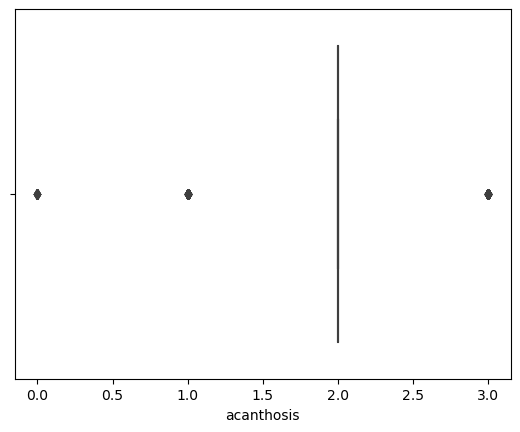

In [113]:
sns.boxplot(x=data.acanthosis)

In [114]:
IQR=stats.iqr(data.acanthosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.acanthosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.acanthosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  2.0
Q3 :  2.0
Lower_limit :  2.0
Upper_limit :  2.0


In [115]:
data.loc[data['acanthosis']>Upper_limit].shape

(75, 35)

In [116]:
75/366

0.20491803278688525

- 20.4% outliers in acanthosis column

## hyperkeratosis

<AxesSubplot:xlabel='hyperkeratosis'>

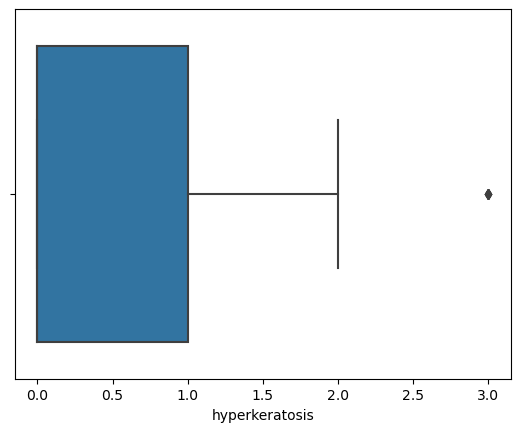

In [117]:
sns.boxplot(x=data.hyperkeratosis)

In [118]:
IQR=stats.iqr(data.hyperkeratosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.hyperkeratosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.hyperkeratosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [119]:
data.loc[data['hyperkeratosis']>Upper_limit].shape

(5, 35)

In [120]:
5/366*100

1.366120218579235

- 1.3% outliers in hyperkeratosis

In [121]:
data.loc[data['hyperkeratosis']>Upper_limit,'hyperkeratosis']= data.hyperkeratosis.median()

In [122]:
# outliers replaced in hyperkeratosis column
data.loc[data['hyperkeratosis']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

## parakeratosis

<AxesSubplot:xlabel='parakeratosis'>

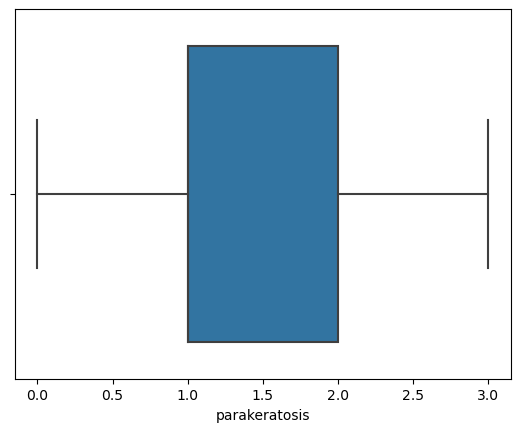

In [123]:
sns.boxplot(x=data.parakeratosis)

In [124]:
IQR=stats.iqr(data.parakeratosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.parakeratosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.parakeratosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_limit :  -0.5
Upper_limit :  3.5


In [125]:
data.loc[data['parakeratosis']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

- no outliers in parakeratosis column

## clubbing_of_the_rete_ridges

<AxesSubplot:xlabel='clubbing_of_the_rete_ridges'>

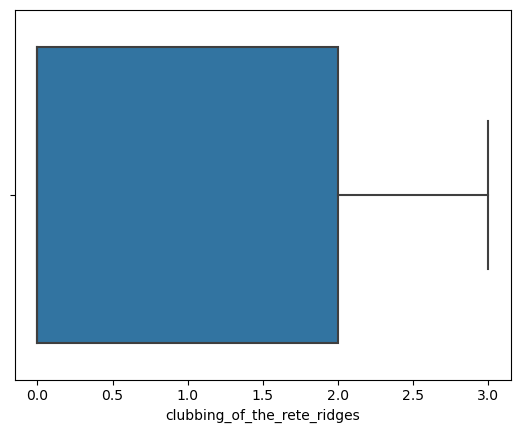

In [126]:
sns.boxplot(x=data.clubbing_of_the_rete_ridges)

In [127]:
IQR=stats.iqr(data.clubbing_of_the_rete_ridges,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.clubbing_of_the_rete_ridges.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.clubbing_of_the_rete_ridges.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  0.0
Q3 :  2.0
Lower_limit :  -3.0
Upper_limit :  5.0


In [128]:
data.loc[data['clubbing_of_the_rete_ridges']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

 - no outliers in clubbing_of_the_rete_ridges column

## elongation_of_the_rete_ridges

<AxesSubplot:xlabel='elongation_of_the_rete_ridges'>

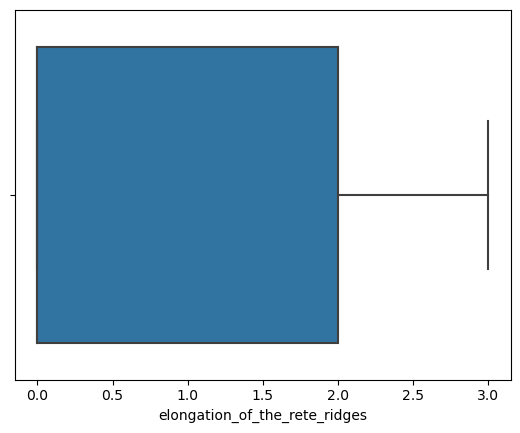

In [129]:
sns.boxplot(x=data.elongation_of_the_rete_ridges)

In [130]:
IQR=stats.iqr(data.elongation_of_the_rete_ridges,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.clubbing_of_the_rete_ridges.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.clubbing_of_the_rete_ridges.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  0.0
Q3 :  2.0
Lower_limit :  -3.0
Upper_limit :  5.0


In [131]:
data.loc[data['elongation_of_the_rete_ridges']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

 - no outliers in elongation_of_the_rete_ridges column

## thinning_of_the_suprapapillary_epidermis

<AxesSubplot:xlabel='thinning_of_the_suprapapillary_epidermis'>

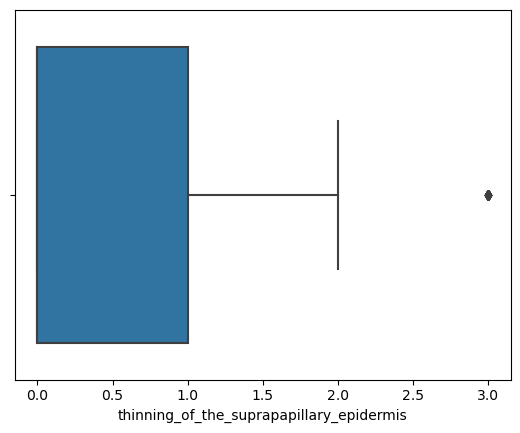

In [132]:
sns.boxplot(x=data.thinning_of_the_suprapapillary_epidermis)

In [133]:
IQR=stats.iqr(data.thinning_of_the_suprapapillary_epidermis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.thinning_of_the_suprapapillary_epidermis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.thinning_of_the_suprapapillary_epidermis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [134]:
data.loc[data['thinning_of_the_suprapapillary_epidermis']>Upper_limit].shape

(31, 35)

In [135]:
31/366*100

8.469945355191257

- 8.4% outliers in thinning_of_the_suprapapillary_epidermis

## spongiform_pustule

<AxesSubplot:xlabel='spongiform_pustule'>

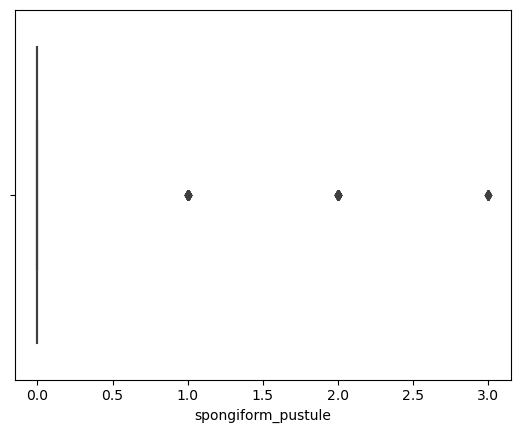

In [136]:
sns.boxplot(x=data.spongiform_pustule)

In [137]:
IQR=stats.iqr(data.spongiform_pustule,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.spongiform_pustule.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.spongiform_pustule.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [138]:
data.loc[data['spongiform_pustule']>Upper_limit].shape

(70, 35)

In [139]:
70/366*100

19.12568306010929

- 19% outliers in spongiform_pustule column

## munro_microabcess

<AxesSubplot:xlabel='munro_microabcess'>

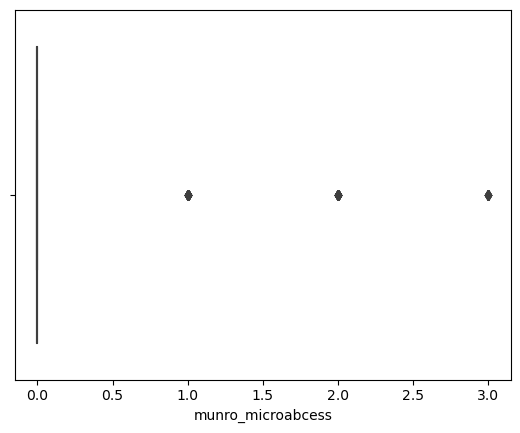

In [140]:
sns.boxplot(x=data.munro_microabcess)

In [141]:
IQR=stats.iqr(data.munro_microabcess,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.munro_microabcess.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.munro_microabcess.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [142]:
data.loc[data['munro_microabcess']>Upper_limit].shape

(80, 35)

In [143]:
80/366*100

21.85792349726776

- 21.8% outliers in munro_microabcess column

## focal_hypergranulosis

<AxesSubplot:xlabel='focal_hypergranulosis'>

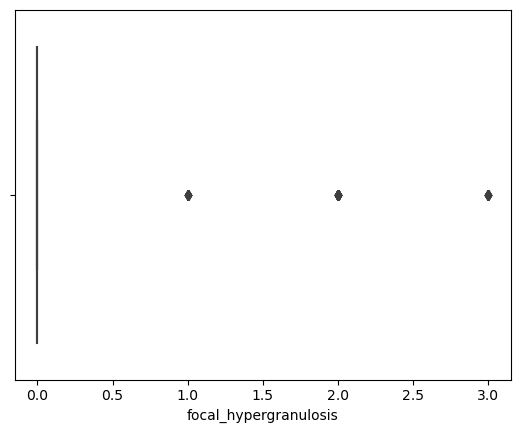

In [144]:
sns.boxplot(x=data.focal_hypergranulosis)

In [145]:
IQR=stats.iqr(data.focal_hypergranulosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.focal_hypergranulosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.focal_hypergranulosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [146]:
data.loc[data['focal_hypergranulosis']>Upper_limit].shape

(71, 35)

In [147]:
71/366*100

19.398907103825135

- 19.8% outliers in focal_hypergranulosis column

## disappearance_of_the_granular_layer

<AxesSubplot:xlabel='disappearance_of_the_granular_layer'>

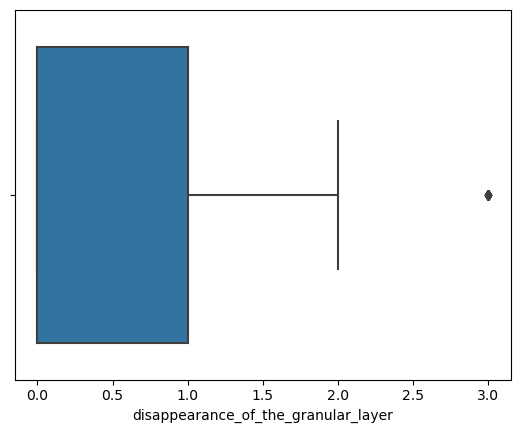

In [148]:
sns.boxplot(x=data.disappearance_of_the_granular_layer)

In [149]:
IQR=stats.iqr(data.disappearance_of_the_granular_layer,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.disappearance_of_the_granular_layer.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.disappearance_of_the_granular_layer.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  0.0
Q3 :  1.0
Lower_limit :  -1.5
Upper_limit :  2.5


In [150]:
data.loc[data['disappearance_of_the_granular_layer']>Upper_limit].shape

(14, 35)

In [151]:
14/366*100

3.825136612021858

- 3% outliers in disappearance_of_the_granular_layer column

In [152]:
data.loc[data['disappearance_of_the_granular_layer']>Upper_limit,'disappearance_of_the_granular_layer']= data.disappearance_of_the_granular_layer.median()

In [153]:
data.loc[data['disappearance_of_the_granular_layer']>Upper_limit]

Empty DataFrame
Columns: [erythema, scaling, definite_borders, itching, koebner_phenomenon, polygonal_papules, follicular_papules, oral_mucosal_involvement, knee_and_elbow_involvement, scalp_involvement, family_history, melanin_incontinence, eosinophils_in_the_infiltrate, PNL_infiltrate, fibrosis_of_the_papillary_dermis, exocytosis, acanthosis, hyperkeratosis, parakeratosis, clubbing_of_the_rete_ridges, elongation_of_the_rete_ridges, thinning_of_the_suprapapillary_epidermis, spongiform_pustule, munro_microabcess, focal_hypergranulosis, disappearance_of_the_granular_layer, vacuolisation_and_damage_of_basal_layer, spongiosis, saw-tooth_appearance_of_retes, follicular_horn_plug, perifollicular_parakeratosis, inflammatory_monoluclear_inflitrate, band-like_infiltrate, Age, class]
Index: []

- outliers handled in disappearance_of_the_granular_layer column

## vacuolisation_and_damage_of_basal_layer

<AxesSubplot:xlabel='vacuolisation_and_damage_of_basal_layer'>

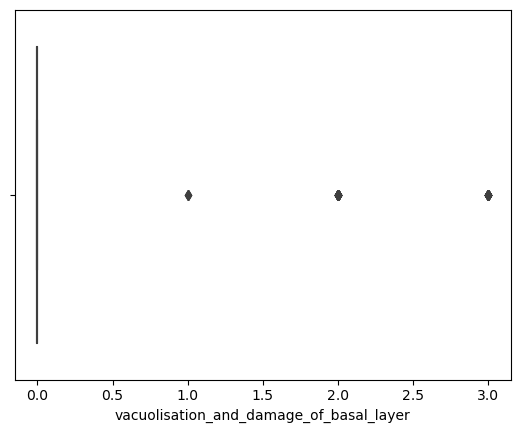

In [154]:
sns.boxplot(x=data.vacuolisation_and_damage_of_basal_layer)

In [155]:
IQR=stats.iqr(data.vacuolisation_and_damage_of_basal_layer,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.vacuolisation_and_damage_of_basal_layer.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.vacuolisation_and_damage_of_basal_layer.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [156]:
data.loc[data['vacuolisation_and_damage_of_basal_layer']>Upper_limit].shape

(72, 35)

In [157]:
72/366*100

19.672131147540984

- 19% outliers in vacuolisation_and_damage_of_basal_layer

## spongiosis

<AxesSubplot:xlabel='spongiosis'>

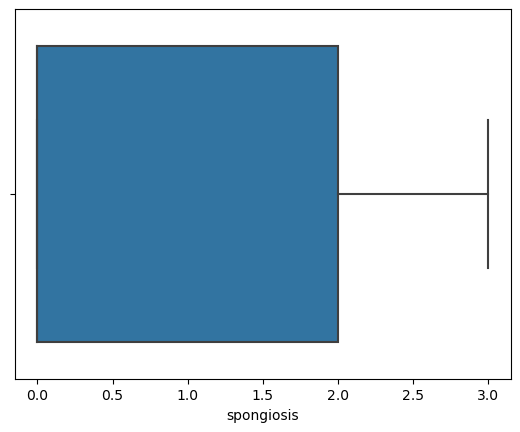

In [158]:
sns.boxplot(x=data.spongiosis)

In [159]:
IQR=stats.iqr(data.spongiosis,interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data.spongiosis.quantile(0.25)
print('Q1 : ',Q1)

Q3 = data.spongiosis.quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  2.0
Q1 :  0.0
Q3 :  2.0
Lower_limit :  -3.0
Upper_limit :  5.0


In [160]:
data.loc[data['spongiosis']>Upper_limit].shape

(0, 35)

- no outliers in spongiosis column

## saw-tooth_appearance_of_retes

<AxesSubplot:xlabel='saw-tooth_appearance_of_retes'>

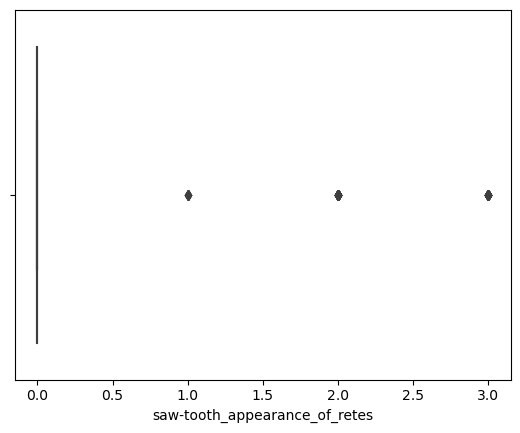

In [161]:
sns.boxplot(x=data['saw-tooth_appearance_of_retes'])

In [162]:
IQR=stats.iqr(data['saw-tooth_appearance_of_retes'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['saw-tooth_appearance_of_retes'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['saw-tooth_appearance_of_retes'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [163]:
data.loc[data['saw-tooth_appearance_of_retes']>Upper_limit].shape

(72, 35)

In [164]:
72/366*100

19.672131147540984

- 19% outliers in saw-tooth_appearance_of_retes column

## follicular_horn_plug

<AxesSubplot:xlabel='follicular_horn_plug'>

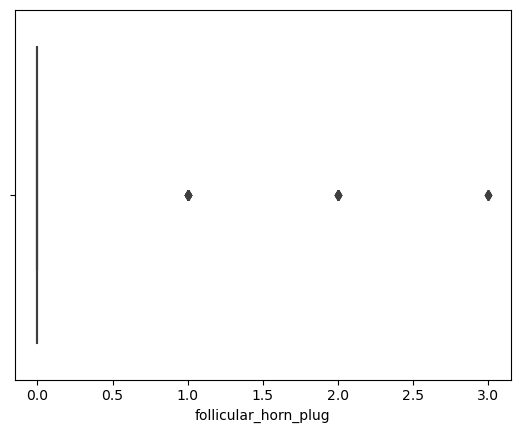

In [165]:
sns.boxplot(x=data['follicular_horn_plug'])

In [166]:
IQR=stats.iqr(data['follicular_horn_plug'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['follicular_horn_plug'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['follicular_horn_plug'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [167]:
data.loc[data['follicular_horn_plug']>Upper_limit].shape

(22, 35)

In [168]:
22/366*100

6.0109289617486334

- 6% outliers in follicular_horn_plug column

## perifollicular_parakeratosis

<AxesSubplot:xlabel='perifollicular_parakeratosis'>

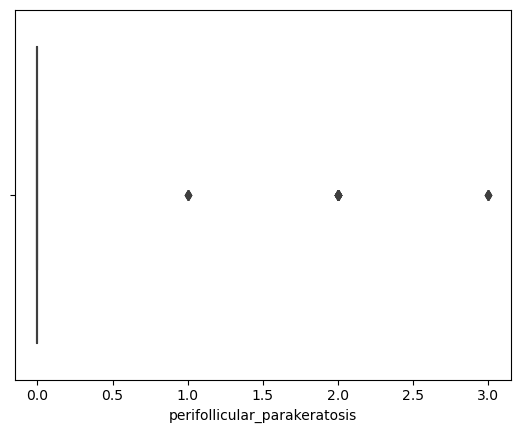

In [169]:
sns.boxplot(x=data['perifollicular_parakeratosis'])

In [170]:
IQR=stats.iqr(data['perifollicular_parakeratosis'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['perifollicular_parakeratosis'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['perifollicular_parakeratosis'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [171]:
data.loc[data['perifollicular_parakeratosis']>Upper_limit].shape

(21, 35)

In [172]:
21/366*100

5.737704918032787

- 5.7% outliers in perifollicular_parakeratosis

## inflammatory_monoluclear_inflitrate

<AxesSubplot:xlabel='inflammatory_monoluclear_inflitrate'>

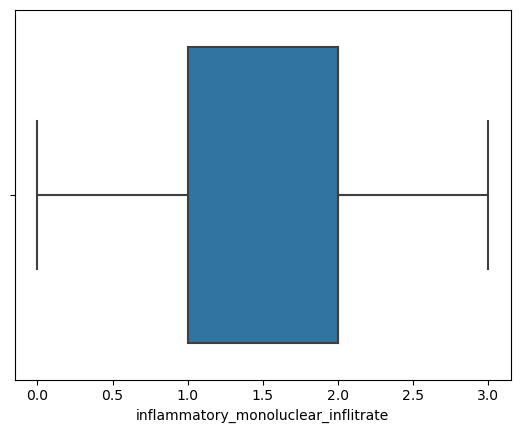

In [173]:
sns.boxplot(x=data['inflammatory_monoluclear_inflitrate'])

In [174]:
IQR=stats.iqr(data['inflammatory_monoluclear_inflitrate'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['inflammatory_monoluclear_inflitrate'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['inflammatory_monoluclear_inflitrate'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  1.0
Q1 :  1.0
Q3 :  2.0
Lower_limit :  -0.5
Upper_limit :  3.5


In [175]:
data.loc[data['inflammatory_monoluclear_inflitrate']>Upper_limit].shape

(0, 35)

- no outliers in inflammatory_monoluclear_inflitrate column

## band-like_infiltrate

<AxesSubplot:xlabel='band-like_infiltrate'>

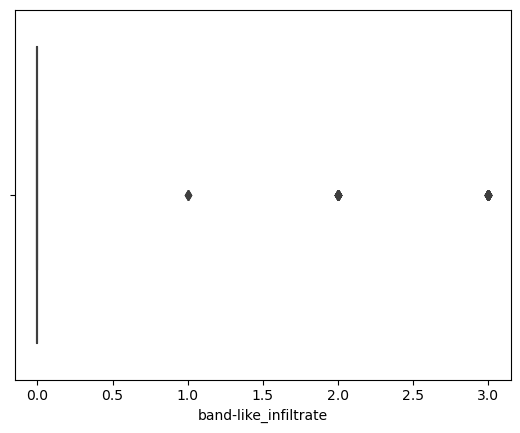

In [176]:
sns.boxplot(x=data['band-like_infiltrate'])

In [177]:
IQR=stats.iqr(data['band-like_infiltrate'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['band-like_infiltrate'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['band-like_infiltrate'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  0.0
Q1 :  0.0
Q3 :  0.0
Lower_limit :  0.0
Upper_limit :  0.0


In [178]:
data.loc[data['band-like_infiltrate']>Upper_limit].shape

(77, 35)

In [179]:
77/366*100

21.03825136612022

- 21% outliers in band-like_infiltrate column

## Age

<AxesSubplot:xlabel='Age'>

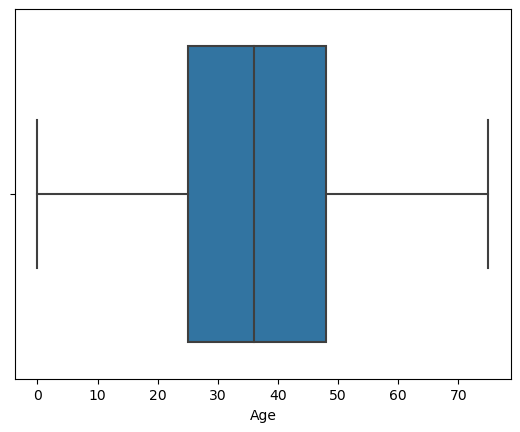

In [180]:
sns.boxplot(x=data['Age'])

In [181]:
IQR=stats.iqr(data['Age'],interpolation='midpoint')
print('IQR : ',IQR)

Q1 = data['Age'].quantile(0.25)
print('Q1 : ',Q1)

Q3 = data['Age'].quantile(0.75)
print('Q3 : ',Q3)

Lower_limit=Q1-1.5*IQR
print('Lower_limit : ',Lower_limit)

Upper_limit=Q3+1.5*IQR
print('Upper_limit : ',Upper_limit)

IQR :  23.0
Q1 :  25.0
Q3 :  48.0
Lower_limit :  -9.5
Upper_limit :  82.5


In [182]:
data.loc[data['Age']>Upper_limit].shape

(0, 35)

- no outiliers in Age column

# Feature engineering

In [183]:
data.corr().T

erythema   scaling  \
erythema                                  1.000000  0.435467   
scaling                                   0.435467  1.000000   
definite_borders                          0.260087  0.357987   
itching                                  -0.047623 -0.084197   
koebner_phenomenon                       -0.012035 -0.071456   
polygonal_papules                         0.033571 -0.075035   
follicular_papules                       -0.109550 -0.092400   
oral_mucosal_involvement                 -0.026810 -0.082969   
knee_and_elbow_involvement                0.141008  0.298398   
scalp_involvement                         0.186684  0.301577   
family_history                            0.172059  0.181491   
melanin_incontinence                      0.042126 -0.074856   
eosinophils_in_the_infiltrate             0.075228  0.042211   
PNL_infiltrate                            0.187359  0.271671   
fibrosis_of_the_papillary_dermis         -0.354595 -0.383585   
exocytosis                                0.021565 -0.110809   
acanthosis                                0.064165  0.108095   
hyperkeratosis                           -0.106739 -0.019632   
parakeratosis                             0.210030  0.296752   
clubbing_of_the_rete_ridges               0.157558  0.320740   
elongation_of_the_rete_ridges             0.007819  0.139073   
thinning_of_the_suprapapillary_epidermis  0.167868  0.330343   
spongiform_pustule                        0.169773  0.297783   
munro_microabcess                         0.113464  0.186366   
focal_hypergranulosis                    -0.013761 -0.085021   
disappearance_of_the_granular_layer       0.106782  0.195252   
vacuolisation_and_damage_of_basal_layer   0.002559 -0.109523   
spongiosis                                0.022468  0.012151   
saw-tooth_appearance_of_retes            -0.005779 -0.114467   
follicular_horn_plug                     -0.005450 -0.010518   
perifollicular_parakeratosis              0.009539 -0.011135   
inflammatory_monoluclear_inflitrate       0.075758 -0.010977   
band-like_infiltrate                     -0.006955 -0.132079   
Age                                      -0.013321  0.006028   
class                                    -0.335537 -0.468688   

                                          definite_borders   itching  \
erythema                                          0.260087 -0.047623   
scaling                                           0.357987 -0.084197   
definite_borders                                  1.000000 -0.062564   
itching                                          -0.062564  1.000000   
koebner_phenomenon                                0.184789  0.139461   
polygonal_papules                                 0.327754  0.409696   
follicular_papules                               -0.166662 -0.144825   
oral_mucosal_involvement                          0.286684  0.359163   
knee_and_elbow_involvement                        0.302309 -0.299645   
scalp_involvement                                 0.268862 -0.155639   
family_history                                    0.115844 -0.136615   
melanin_incontinence                              0.311398  0.359207   
eosinophils_in_the_infiltrate                    -0.132021  0.095434   
PNL_infiltrate                                   -0.005296 -0.085967   
fibrosis_of_the_papillary_dermis                 -0.274414  0.203032   
exocytosis                                       -0.205391  0.214822   
acanthosis                                        0.189761  0.067080   
hyperkeratosis                                    0.018282 -0.021178   
parakeratosis                                     0.361213 -0.075568   
clubbing_of_the_rete_ridges                       0.387205 -0.232224   
elongation_of_the_rete_ridges                     0.201702 -0.124058   
thinning_of_the_suprapapillary_epidermis          0.369266 -0.244052   
spongiform_pustule                                0.246204 -0.152689   
munro_mic

<AxesSubplot:>

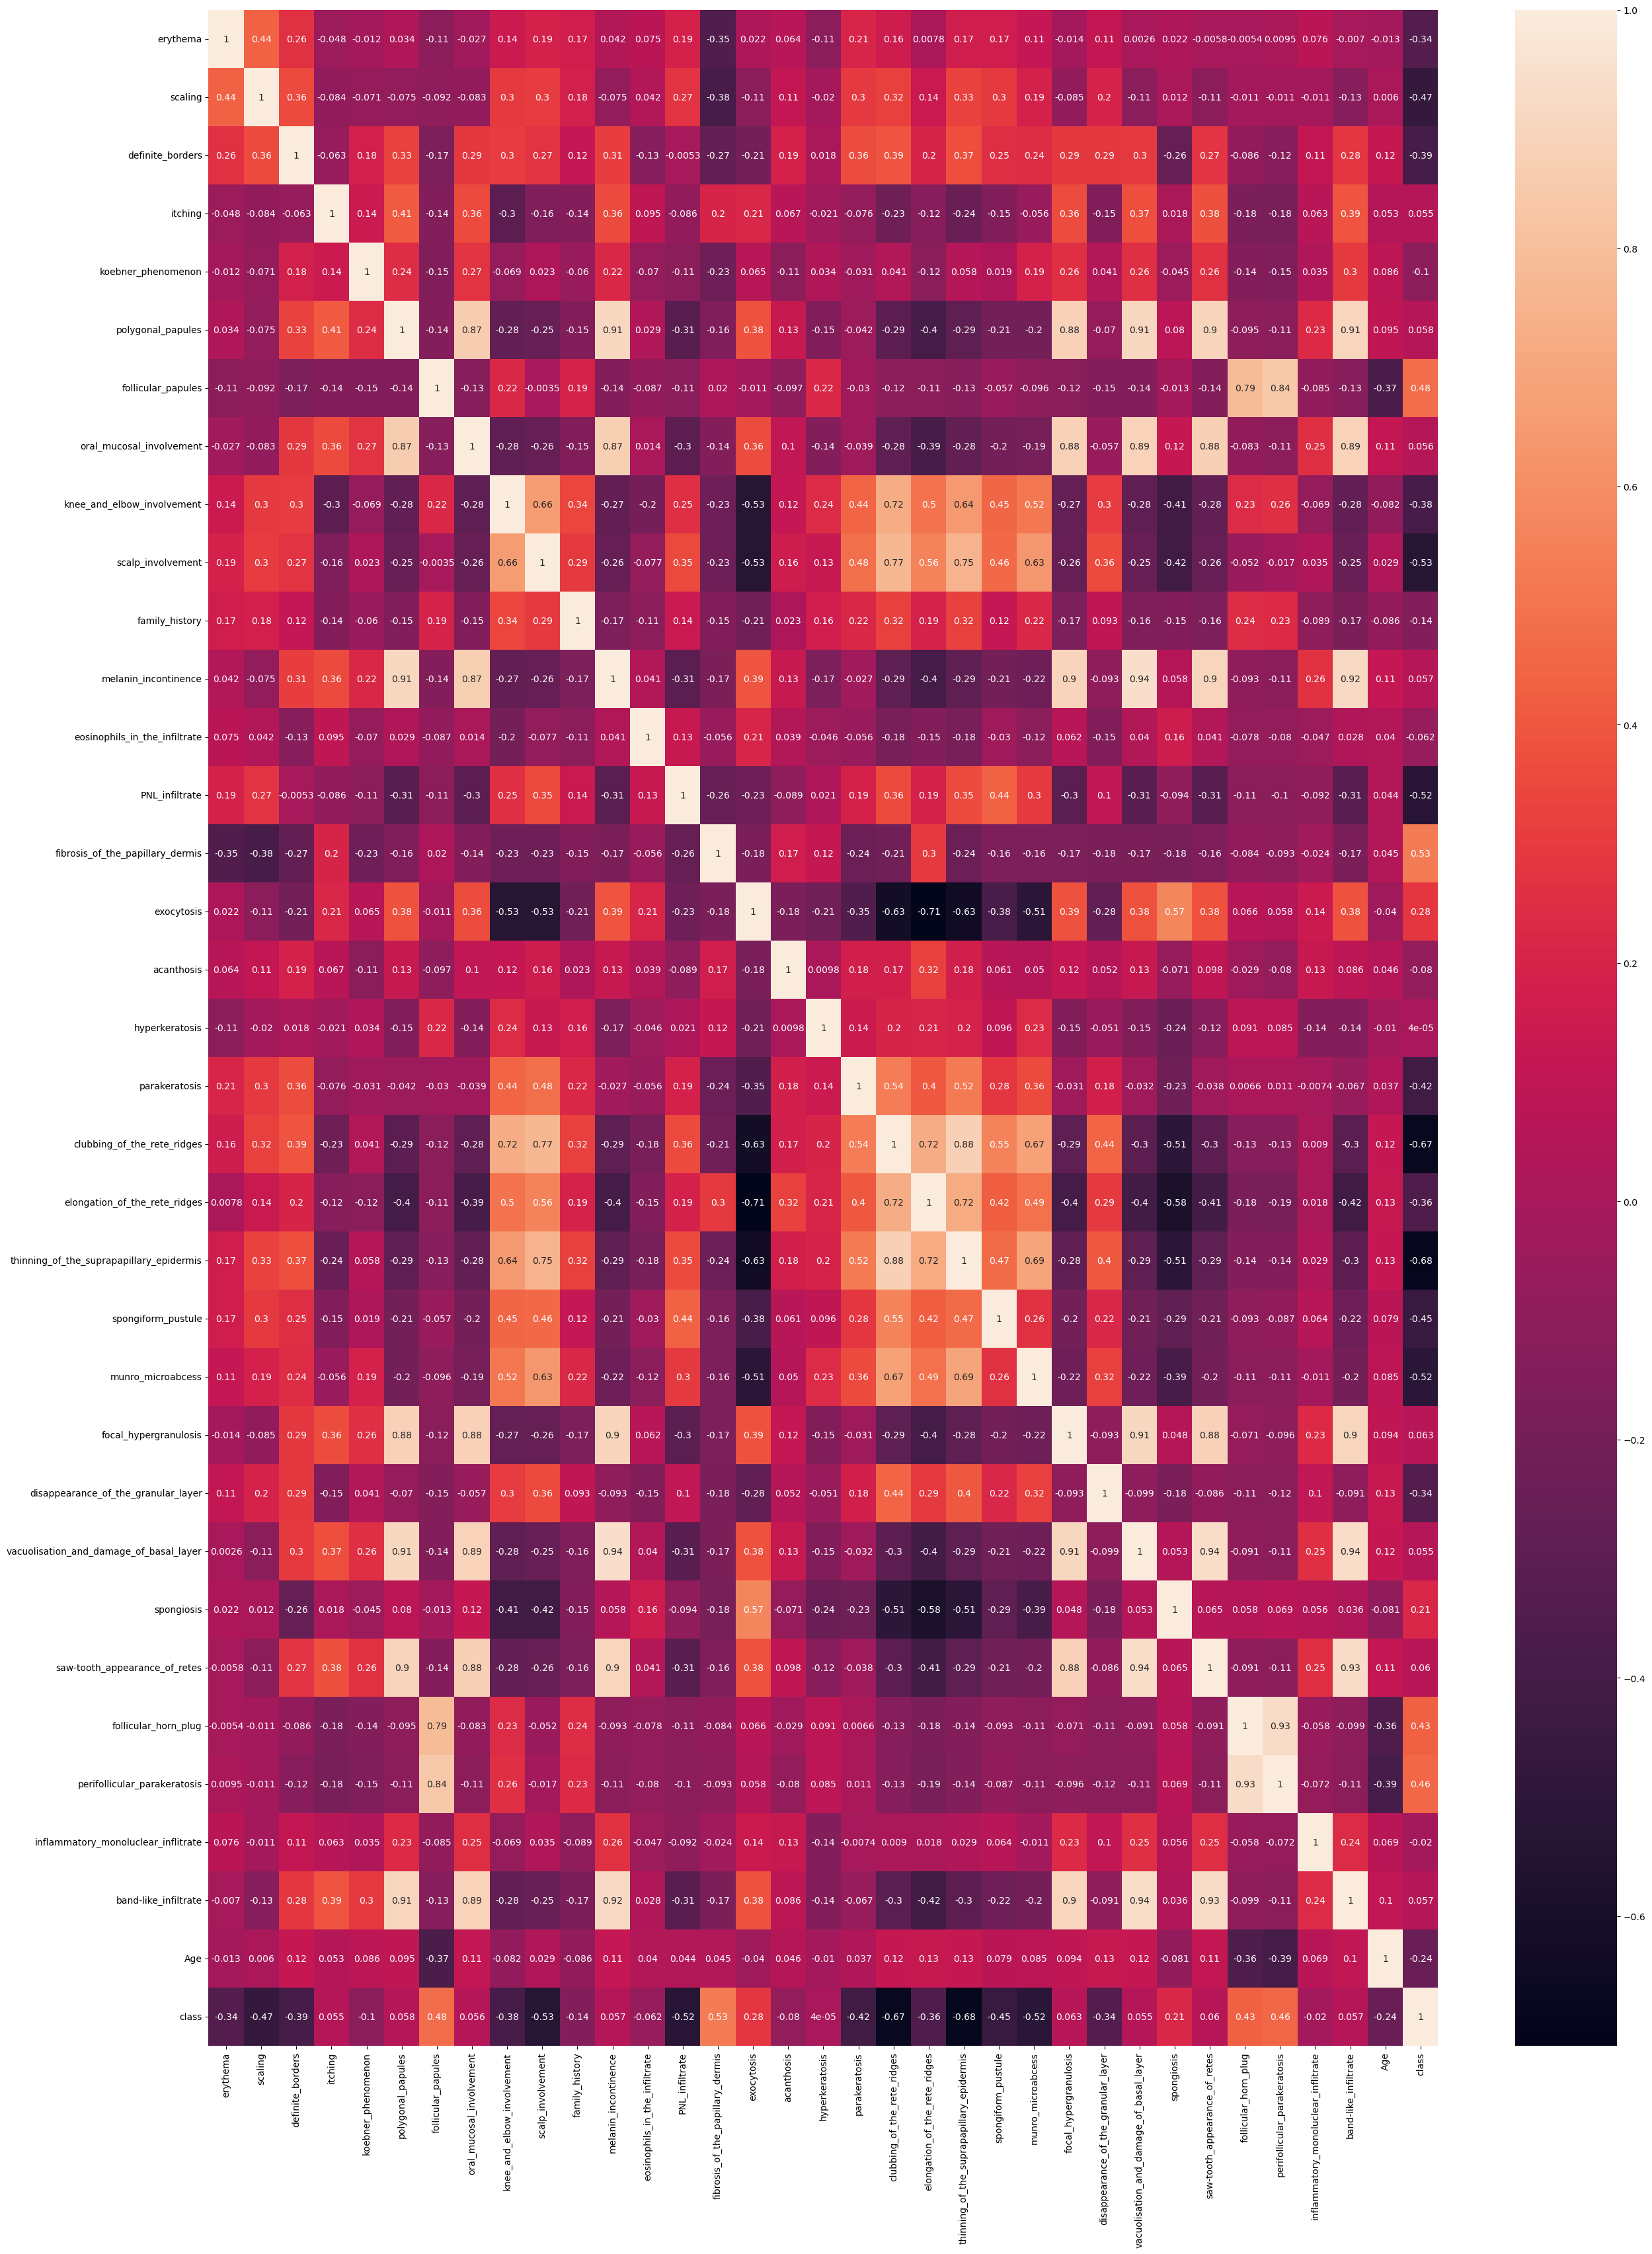

In [184]:
plt.figure(figsize=(30,40))
sns.heatmap(data.corr(),annot=True)

### polygonal_papaules:
- oral_mucosal_involvement -87%
- melanin incontinence- 91%
- focal_hypergranulosis - 88%
- vaculisation_and_damage_of_basal_layer -91%
- band_like_infiltrate -91%


### follicular_papules:
   - parafollicular_parakeratosis -84%
    
### oral_mucosal_involvement:
   - polygonal_papules -87%
   - melanin_incontinence -87%
   - focal_hypergranulosis -88%
   - vaculisation_and_damage_of_basal_layer -89%
   - saw-tooth-appearance of rates -88%
   - band-like infiltrate- 89%
    
### focal_hypergranulosis:
   - polygonal_papules - 88%
   - oral_mucosal_invovlement - 88%
   - vaculisation_and_damage_of_basal_layer -91%
   - saw-tooth-appearance of rates - 88%
    
### vaculisation_and_damage_of_basal_layer:
   - polygonal_papules - 91%
   - oral_mucosal_invovlement - 89%
   - melanin_incontinence - 94%
   - focal_hypergranulosis- 91%
   - saw-tooth-appearance of rates- 91%
   - band-like infiltrate-94%

### saw-tooth-appearance of rates:
   - oral_mucosal_invovlement- 88%
   - focal_hypergranulosis - 88%
   - vaculisation_and_damage_of_basal_layer -94%
   - band-like infiltrate- 93%

### follicular_horn_plug:
   - peifollicular_keratosis -91%
    
### band_like_infiltrate:
   - polygonal_papules - 91%
   - oral_mucosal_invovlement- 89%
   - melanin_incontinence- 92%
   - vaculisation_and_damage_of_basal_layer- 94%
   - saw-tooth appearance of rates- 95%

### these are the highly co-related columns:
    - polygonal_papules
    - oral_mucosal_invovlement
    - vaculisation_and_damage_of_basal_layer
    - saw-tooth-appearance of rates
    - perifollicular_keratosis
    - melanin incontinence
    - band-like infiltrate

In [185]:
#dropping highly co-related values
data.drop(['polygonal_papules','oral_mucosal_involvement',
           'vacuolisation_and_damage_of_basal_layer','saw-tooth_appearance_of_retes',
          'perifollicular_parakeratosis','melanin_incontinence','band-like_infiltrate'],axis=1,inplace=True)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  366 non-null    int64
 1   scaling                                   366 non-null    int64
 2   definite_borders                          366 non-null    int64
 3   itching                                   366 non-null    int64
 4   koebner_phenomenon                        366 non-null    int64
 5   follicular_papules                        366 non-null    int64
 6   knee_and_elbow_involvement                366 non-null    int64
 7   scalp_involvement                         366 non-null    int64
 8   family_history                            366 non-null    int64
 9   eosinophils_in_the_infiltrate             366 non-null    int64
 10  PNL_infiltrate                            366 non-null    int6

# Model creation

## SPLITING DATA

In [187]:
from sklearn.model_selection import train_test_split

In [188]:
X= data.drop('class',axis=1)

In [189]:
y = data['class']

In [190]:
x_test,x_train,y_test,y_train = train_test_split(X,y,random_state=2,test_size=0.75)

In [191]:
y

0      2
1      1
2      3
3      1
4      3
5      2
6      5
7      3
8      4
9      4
10     1
11     2
12     2
13     1
14     3
15     4
16     2
17     1
18     3
19     5
20     6
21     2
22     5
23     3
24     5
25     1
26     6
27     5
28     2
29     3
30     1
31     2
32     1
33     1
34     4
35     2
36     3
37     2
38     3
39     1
40     2
41     4
42     1
43     2
44     5
45     3
46     4
47     6
48     2
49     3
50     3
51     4
52     1
53     1
54     5
55     1
56     2
57     3
58     4
59     2
60     6
61     1
62     5
63     1
64     2
65     3
66     1
67     4
68     5
69     1
70     2
71     6
72     3
73     5
74     4
75     2
76     2
77     1
78     3
79     5
80     1
81     2
82     2
83     2
84     5
85     1
86     1
87     3
88     1
89     4
90     2
91     2
92     5
93     1
94     3
95     4
96     2
97     5
98     1
99     6
100    2
101    5
102    1
103    2
104    2
105    1
106    4
107    1
108    3
109    1
110    1
1

In [192]:
y.value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

- imbalanced data

## smote

In [193]:
from imblearn.over_sampling import SMOTE

In [194]:
smote=SMOTE()

In [195]:
x_smote,y_smote = smote.fit_resample(x_train,y_train)

In [196]:
from collections import Counter
print('Actual value',Counter(y_train))
print('Smote value',Counter(y_smote))

Actual value Counter({1: 88, 3: 55, 2: 40, 5: 39, 4: 36, 6: 17})
Smote value Counter({4: 88, 2: 88, 6: 88, 1: 88, 5: 88, 3: 88})


In [197]:
y_train.value_counts().sum()

275

In [198]:
data['class'].value_counts().sum()

366

In [199]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275 entries, 269 to 250
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  275 non-null    int64
 1   scaling                                   275 non-null    int64
 2   definite_borders                          275 non-null    int64
 3   itching                                   275 non-null    int64
 4   koebner_phenomenon                        275 non-null    int64
 5   follicular_papules                        275 non-null    int64
 6   knee_and_elbow_involvement                275 non-null    int64
 7   scalp_involvement                         275 non-null    int64
 8   family_history                            275 non-null    int64
 9   eosinophils_in_the_infiltrate             275 non-null    int64
 10  PNL_infiltrate                            275 non-null    in

In [200]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 177 to 168
Data columns (total 27 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   erythema                                  91 non-null     int64
 1   scaling                                   91 non-null     int64
 2   definite_borders                          91 non-null     int64
 3   itching                                   91 non-null     int64
 4   koebner_phenomenon                        91 non-null     int64
 5   follicular_papules                        91 non-null     int64
 6   knee_and_elbow_involvement                91 non-null     int64
 7   scalp_involvement                         91 non-null     int64
 8   family_history                            91 non-null     int64
 9   eosinophils_in_the_infiltrate             91 non-null     int64
 10  PNL_infiltrate                            91 non-null     int

## Logistic regression

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
model = LogisticRegression()

In [203]:
model.fit(x_train,y_train)

LogisticRegression()

In [204]:
y_pred_log  = model.predict(x_test)

In [205]:
y_train_pred_log  = model.predict(x_train)

## Model evaluation with logistic regression

In [206]:
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score

In [207]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        21
           3       1.00      0.88      0.94        17
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



In [208]:
print(classification_report(y_train,y_train_pred_log))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       0.97      0.95      0.96        40
           3       1.00      1.00      1.00        55
           4       0.95      0.97      0.96        36
           5       1.00      1.00      1.00        39
           6       1.00      1.00      1.00        17

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



In [209]:
pd.crosstab(y_test,y_pred_log)

col_0   1   2   3   4   5  6
class                       
1      24   0   0   0   0  0
2       0  21   0   0   0  0
3       0   0  15   2   0  0
4       0   0   0  13   0  0
5       0   0   0   0  13  0
6       0   0   0   0   0  3

## logistic regression using smote

In [210]:
model.fit(x_smote,y_smote)

LogisticRegression()

In [211]:
y_pred_smote = model.predict(x_smote)

In [212]:
y_pred_smote

array([4, 2, 6, 1, 2, 5, 3, 5, 5, 2, 3, 4, 3, 3, 4, 3, 5, 1, 6, 3, 1, 1,
       1, 3, 2, 6, 3, 1, 1, 3, 4, 2, 4, 1, 1, 4, 1, 4, 1, 1, 2, 6, 3, 1,
       1, 5, 1, 4, 2, 5, 3, 5, 5, 1, 1, 1, 2, 3, 1, 5, 6, 4, 5, 1, 5, 3,
       2, 1, 2, 1, 4, 1, 1, 3, 1, 1, 1, 4, 4, 2, 3, 1, 1, 4, 1, 5, 3, 4,
       4, 3, 6, 4, 1, 5, 2, 1, 6, 2, 1, 5, 6, 2, 2, 2, 3, 1, 2, 4, 1, 2,
       1, 1, 4, 3, 1, 1, 2, 4, 4, 5, 4, 1, 2, 3, 2, 1, 3, 3, 3, 5, 4, 1,
       1, 2, 3, 5, 3, 2, 4, 3, 1, 5, 5, 3, 3, 2, 1, 6, 1, 5, 3, 2, 3, 1,
       1, 3, 4, 1, 1, 1, 3, 2, 1, 5, 4, 2, 1, 3, 1, 5, 3, 5, 4, 1, 5, 5,
       2, 5, 1, 5, 3, 5, 2, 4, 3, 1, 1, 6, 5, 4, 1, 1, 2, 3, 6, 2, 1, 4,
       2, 3, 3, 1, 3, 4, 4, 3, 2, 1, 4, 4, 2, 3, 1, 3, 6, 6, 1, 1, 1, 5,
       6, 1, 2, 1, 1, 1, 3, 1, 3, 1, 4, 6, 6, 6, 5, 3, 1, 1, 2, 5, 1, 1,
       1, 3, 1, 1, 1, 5, 5, 3, 1, 3, 1, 2, 3, 2, 4, 3, 4, 4, 5, 3, 1, 5,
       3, 1, 1, 1, 5, 1, 5, 2, 5, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 2,

In [213]:
y_test_pred_smote = model.predict(x_test)

In [214]:
y_test_pred_smote

array([2, 2, 4, 6, 4, 2, 4, 1, 2, 5, 1, 1, 2, 1, 2, 5, 5, 2, 5, 2, 1, 2,
       1, 2, 5, 1, 1, 2, 4, 5, 3, 3, 2, 6, 3, 2, 2, 2, 3, 2, 5, 1, 1, 1,
       4, 4, 5, 4, 1, 5, 1, 3, 3, 1, 1, 1, 2, 5, 1, 3, 3, 1, 4, 1, 3, 4,
       1, 3, 4, 4, 1, 2, 3, 1, 2, 1, 4, 3, 1, 6, 3, 2, 4, 3, 5, 2, 5, 5,
       3, 4, 4], dtype=int64)

## evaluation of logistic regression with smote

In [215]:
print(classification_report(y_smote,y_pred_smote))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88
           2       0.93      0.92      0.93        88
           3       1.00      0.99      0.99        88
           4       0.92      0.94      0.93        88
           5       1.00      1.00      1.00        88
           6       1.00      1.00      1.00        88

    accuracy                           0.98       528
   macro avg       0.98      0.98      0.98       528
weighted avg       0.98      0.98      0.98       528



In [216]:
print(classification_report(y_test,y_test_pred_smote))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        21
           3       1.00      0.88      0.94        17
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



## K- nearest neighbours

In [217]:
from sklearn.neighbors import KNeighborsClassifier

In [218]:
error_rate=[]

for i in range(1,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    y_knn_predict = model_knn.predict(x_test)
    error_rate.append(np.mean(y_knn_predict!=y_test))
error_rate

[0.21978021978021978,
 0.17582417582417584,
 0.2087912087912088,
 0.1978021978021978,
 0.26373626373626374,
 0.23076923076923078,
 0.32967032967032966,
 0.32967032967032966,
 0.3516483516483517,
 0.34065934065934067]

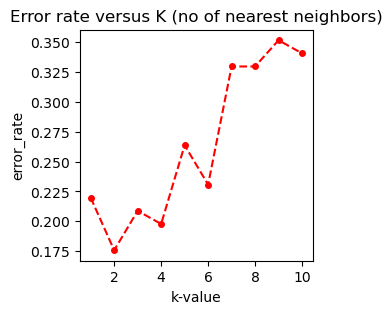

In [219]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate")
plt.show()

In [220]:
model_knn = KNeighborsClassifier(n_neighbors=7)

In [221]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [222]:
y_knn_predict_train = model_knn.predict(x_train)

In [223]:
y_knn_predict = model_knn.predict(x_test)

In [224]:
y_knn_predict

array([2, 2, 4, 6, 6, 4, 4, 1, 2, 5, 1, 1, 2, 1, 3, 5, 2, 2, 4, 2, 1, 4,
       1, 4, 5, 1, 1, 4, 2, 5, 3, 3, 2, 6, 3, 4, 4, 6, 3, 4, 3, 1, 1, 1,
       2, 1, 6, 4, 1, 5, 6, 4, 4, 1, 1, 1, 6, 5, 1, 3, 3, 1, 2, 1, 3, 4,
       1, 3, 4, 4, 1, 2, 3, 1, 4, 1, 2, 3, 1, 6, 3, 4, 2, 3, 5, 4, 5, 5,
       3, 2, 4], dtype=int64)

In [225]:
print(classification_report(y_train,y_knn_predict_train))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98        88
           2       0.71      0.68      0.69        40
           3       0.94      0.89      0.92        55
           4       0.61      0.78      0.68        36
           5       0.97      0.87      0.92        39
           6       0.84      0.94      0.89        17

    accuracy                           0.87       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.88      0.87      0.87       275



- accuracy 85% for train when k=3
- accuracy 89% for train when k=5
- accuracy 87% for train when k=7

In [226]:
print(classification_report(y_test,y_knn_predict))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        24
           2       0.53      0.38      0.44        21
           3       0.87      0.76      0.81        17
           4       0.25      0.38      0.30        13
           5       1.00      0.69      0.82        13
           6       0.38      1.00      0.55         3

    accuracy                           0.67        91
   macro avg       0.66      0.70      0.65        91
weighted avg       0.73      0.67      0.69        91



- when k=3 the accuracy is 79%
- when k=5 the accuracy is 74%
- when k=7 the accuracy is 67%
- when k=9 the accuracy is 65%

## Knn using smote

In [227]:
error_rate_smote=[]

for i in range(1,11):
    model_knn_smote = KNeighborsClassifier(n_neighbors=i)
    model_knn_smote.fit(x_smote,y_smote)
    y_knn_predict = model_knn_smote.predict(x_test)
    error_rate_smote.append(np.mean(y_knn_predict!=y_test))
error_rate_smote

[0.1978021978021978,
 0.18681318681318682,
 0.23076923076923078,
 0.21978021978021978,
 0.23076923076923078,
 0.24175824175824176,
 0.26373626373626374,
 0.27472527472527475,
 0.2857142857142857,
 0.2857142857142857]

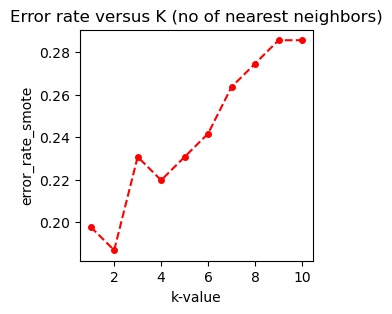

In [228]:
plt.figure(figsize=(3,3))
plt.plot(range(1,11),error_rate_smote,color="red",linestyle="dashed",marker='o',markersize=4)
plt.title("Error rate versus K (no of nearest neighbors)")
plt.xlabel("k-value")
plt.ylabel("error_rate_smote")
plt.show()

In [229]:
model_knn_smote = KNeighborsClassifier(n_neighbors=3)

In [230]:
model_knn_smote.fit(x_smote,y_smote)

KNeighborsClassifier(n_neighbors=3)

In [231]:
y_knn_predict_smote = model_knn_smote.predict(x_test)

In [232]:
print(classification_report(y_test,y_knn_predict_smote))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.65      0.52      0.58        21
           3       0.83      0.88      0.86        17
           4       0.47      0.54      0.50        13
           5       1.00      0.77      0.87        13
           6       0.43      1.00      0.60         3

    accuracy                           0.77        91
   macro avg       0.73      0.79      0.73        91
weighted avg       0.79      0.77      0.77        91



- when n=3 accuarcy is 75%
- when n=5 accuracy is 71%
- when n=7 accuracy is 69%
- when n= accuracy is 68%

# Support vector classifier for train data

In [233]:
from sklearn.svm import SVC

In [234]:
model_svc = SVC()

In [235]:
model_svc.fit(x_train,y_train)

SVC()

In [236]:
y_predict_svc = model_svc.predict(x_test)

In [237]:
y_predict_svc

array([3, 3, 3, 6, 6, 3, 3, 1, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 1, 4, 1, 3,
       1, 4, 5, 1, 1, 3, 3, 5, 3, 3, 3, 6, 3, 3, 3, 6, 3, 3, 3, 1, 1, 1,
       3, 1, 6, 3, 1, 3, 6, 3, 3, 1, 1, 1, 6, 3, 1, 3, 3, 1, 3, 1, 3, 4,
       1, 3, 3, 3, 1, 4, 3, 1, 3, 1, 3, 3, 1, 6, 3, 4, 4, 3, 3, 3, 3, 3,
       3, 3, 4], dtype=int64)

In [238]:
print(classification_report(y_test,y_predict_svc))
pd.crosstab(y_test,y_predict_svc)

              precision    recall  f1-score   support

           1       0.92      0.96      0.94        24
           2       0.00      0.00      0.00        21
           3       0.35      1.00      0.52        17
           4       0.43      0.23      0.30        13
           5       1.00      0.15      0.27        13
           6       0.38      1.00      0.55         3

    accuracy                           0.53        91
   macro avg       0.51      0.56      0.43        91
weighted avg       0.52      0.53      0.44        91



col_0   1   3  4  5  6
class                 
1      23   0  0  0  1
2       0  15  4  0  2
3       0  17  0  0  0
4       1   8  3  0  1
5       1   9  0  2  1
6       0   0  0  0  3

In [239]:
print(accuracy_score(y_test,y_predict_svc))

0.5274725274725275


- 53% accuracy in svm without c and gamma value

In [240]:
model = SVC(kernel='rbf',C=20,gamma=0.001)

In [241]:
model.fit(x_train,y_train)

SVC(C=20, gamma=0.001)

In [242]:
y_predict_svc_kernel = model.predict(x_test)

In [243]:
print(classification_report(y_test,y_predict_svc_kernel))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.91      0.95      0.93        21
           3       1.00      0.88      0.94        17
           4       0.79      0.85      0.81        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.95        91
   macro avg       0.95      0.95      0.95        91
weighted avg       0.95      0.95      0.95        91



In [244]:
print(accuracy_score(y_test,y_predict_svc_kernel))

0.945054945054945


- 95% accuracy when c=20 and gamma is 0.001

## support vector classifier for smote data

In [245]:
model_smote = SVC()

In [246]:
model_smote.fit(x_smote,y_smote)

SVC()

In [247]:
y_predict_svc = model.predict(x_test)

In [248]:
print(classification_report(y_test,y_predict_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.91      0.95      0.93        21
           3       1.00      0.88      0.94        17
           4       0.79      0.85      0.81        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.95        91
   macro avg       0.95      0.95      0.95        91
weighted avg       0.95      0.95      0.95        91



In [249]:
print(accuracy_score(y_test,y_predict_svc))

0.945054945054945


- 95% accuracy on balancing of data

In [250]:
# cross validation score for svm
from sklearn.model_selection import cross_val_score

In [251]:
scores= cross_val_score(model_svc,X,y,cv=10,scoring='accuracy')

In [252]:
print("cross validation score",scores.mean())

cross validation score 0.6092342342342342


- the cross validation score for svm is 60%

## hyperparameter tuning using svc

In [253]:
from sklearn.model_selection import GridSearchCV

In [254]:
param_grid={'C':[0.1,5,10,50,60,70],'gamma':[1,0.1,0.01,0.001,0.001],'random_state':list(range(1,20))}

In [255]:
model_hyperparameter = SVC()

In [256]:
grid = GridSearchCV(model_hyperparameter,param_grid,verbose=2,scoring='accuracy',cv=5)

In [257]:
grid.fit(X,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=7; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0

[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=11; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=12; total time=   0.0s
[CV] END ................C=0

[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=11; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=12; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=19; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=18; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................C=5, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=

[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=10, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=18; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=3; total time=   0.0s
[CV] END ...................

[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=10; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=11; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=60, gamma=0.001, random_state=12; total time=   0.0s
[CV] END .................C=

[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=13; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ..................C

[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=1; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=2; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=70, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy', verbose=2)

In [258]:
print(grid.best_params_)

{'C': 60, 'gamma': 0.001, 'random_state': 1}


### svc hyperparameter without smote

In [259]:
model_svc_hyperparameter = SVC(C=60,gamma=0.001,random_state=1)

In [260]:
model_svc_hyperparameter.fit(x_train,y_train)

SVC(C=60, gamma=0.001, random_state=1)

In [261]:
y_pred_hyperparameter = model_svc_hyperparameter.predict(x_test)

In [262]:
accuracy_score(y_test,y_pred_hyperparameter)

0.967032967032967

- 96% accuracy after tuning hyperparameter without smote

## svc hyperparameter with smote

In [263]:
model_svc_hyperparameter_smote = SVC(C=60,gamma=0.001,random_state=1)

In [264]:
model_svc_hyperparameter_smote.fit(x_smote,y_smote)

SVC(C=60, gamma=0.001, random_state=1)

In [265]:
y_pred_hyperparameter_smote = model_svc_hyperparameter_smote.predict(x_test)

In [266]:
accuracy_score(y_test,y_pred_hyperparameter_smote)

0.945054945054945

- 95% accuracy after tuning hyperparameter with smote

# descion tree classifier

In [267]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [268]:
y_pred=DT.predict(x_test)

In [269]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        24
           2       0.95      0.95      0.95        21
           3       0.94      0.94      0.94        17
           4       0.92      0.92      0.92        13
           5       0.92      0.92      0.92        13
           6       1.00      0.33      0.50         3

    accuracy                           0.93        91
   macro avg       0.94      0.85      0.87        91
weighted avg       0.94      0.93      0.93        91



# Decision Tree Hyperparameter Tunning

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
params={
    "criterion": ("gini","entropy"),
    "splitter": ("best","random"),
    "max_depth": list(range(1,20)),
    "min_samples_split": [2,3,4],
    "min_samples_leaf": list(range(1,20))
}

In [272]:
tree_clf = DecisionTreeClassifier(random_state=3)

In [273]:
tree_cv = GridSearchCV(tree_clf,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

In [274]:
tree_cv.fit(X,y)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=3), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [275]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [276]:
tree_cv.best_score_

0.9426229508196721

# tree cv with best params

In [277]:
tree_clf_best_param = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=3,min_samples_split=2,splitter='best')

In [278]:
tree_clf_best_param.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [279]:
y_tree_clf_best_param_predict = tree_clf_best_param.predict(x_test)

In [280]:
print(classification_report(y_test,y_tree_clf_best_param_predict))

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        24
           2       0.88      1.00      0.93        21
           3       0.94      0.94      0.94        17
           4       1.00      0.77      0.87        13
           5       0.92      0.92      0.92        13
           6       1.00      0.33      0.50         3

    accuracy                           0.92        91
   macro avg       0.94      0.83      0.85        91
weighted avg       0.93      0.92      0.92        91



In [281]:
print(accuracy_score(y_test,y_tree_clf_best_param_predict))

0.9230769230769231


- 92% accuracy with tree cv 

# tree cv with smote and best params

In [282]:
tree_clf_best_param_smote = DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf=3,min_samples_split=2,splitter='best')

In [283]:
tree_clf_best_param_smote.fit(x_smote,y_smote)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=3)

In [284]:
y_tree_clf_best_param_predict_smote = tree_clf_best_param_smote.predict(x_test)

In [285]:
print(classification_report(y_test,y_tree_clf_best_param_predict_smote))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.95      0.90      0.93        21
           3       1.00      0.94      0.97        17
           4       0.80      0.92      0.86        13
           5       0.93      1.00      0.96        13
           6       1.00      0.67      0.80         3

    accuracy                           0.95        91
   macro avg       0.95      0.91      0.92        91
weighted avg       0.95      0.95      0.95        91



In [286]:
print(accuracy_score(y_test,y_tree_clf_best_param_predict_smote))

0.945054945054945


- 90% accuarcy when evaluating the model with smote

# Random Forest

In [287]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [288]:
y_pred_rf=RF.predict(x_test)

In [289]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.95      0.98        21
           3       1.00      0.94      0.97        17
           4       0.87      1.00      0.93        13
           5       1.00      1.00      1.00        13
           6       1.00      1.00      1.00         3

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



# Random Forest Smote

In [290]:
RF.fit(x_smote,y_smote)

RandomForestClassifier()

In [291]:
y_pred_rf_s=RF.predict(x_test)

In [292]:
print(classification_report(y_test,y_pred_rf_s))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        21
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        13
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



# Random Forest Hyperparameter Tunning

In [293]:
from sklearn.model_selection import RandomizedSearchCV

In [294]:
n_estimators = [int(i) for i in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto','sqrt']
max_depth = [int(i) for i in np.linspace(start=10, stop=110, num=10)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]

Random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

Rf_Class = RandomForestClassifier(random_state=42)

Rf_Cv = RandomizedSearchCV(estimator = Rf_Class, scoring='f1', param_distributions=Random_grid, n_iter=100, cv=5, verbose=2, random_state = 42, n_jobs = -1)

Rf_Cv.fit(x_train,y_train)
Rf_best_parem = Rf_Cv.best_params_
print(f"Best paramters : {Rf_best_parem}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters : {'n_estimators': 2000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}


## random forest with best parameters

In [295]:
Rf_Class = RandomForestClassifier(n_estimators=2000,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=10,bootstrap=True)

In [296]:
Rf_Class.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=2000)

In [297]:
y_pred_RF_Class = Rf_Class.predict(x_test)

In [298]:
print(classification_report(y_test,y_pred_RF_Class))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        21
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        13
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



- 99 % accuracy with random forest best parameters tuning

## random forest with best parameters smote

In [299]:
Rf_Class_smote = RandomForestClassifier(n_estimators=2000,min_samples_split=10,min_samples_leaf=2,max_features='sqrt',max_depth=10,bootstrap=True)

In [300]:
Rf_Class_smote.fit(x_smote,y_smote)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=2000)

In [302]:
y_pred_Rf_Class_smote= Rf_Class_smote.predict(x_test)

In [303]:
print(classification_report(y_test,y_pred_Rf_Class_smote))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        21
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        13
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00         3

    accuracy                           0.99        91
   macro avg       0.99      0.99      0.99        91
weighted avg       0.99      0.99      0.99        91



- 99% accuracy in smote for random forest with hyperparameters

## Gradient boosting

In [304]:
from sklearn.ensemble import GradientBoostingClassifier

In [305]:
gbc = GradientBoostingClassifier()

In [306]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [307]:
y_pred_gbc = gbc.predict(x_test)

In [308]:
print(classification_report(y_test,y_pred_gbc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       1.00      0.95      0.98        21
           3       0.94      0.94      0.94        17
           4       0.87      1.00      0.93        13
           5       0.93      1.00      0.96        13
           6       1.00      0.33      0.50         3

    accuracy                           0.96        91
   macro avg       0.96      0.87      0.88        91
weighted avg       0.96      0.96      0.95        91



- 96% accuracy for gradient boosting classifier

## Gradient boosting with smote

In [309]:
gbc_smote = GradientBoostingClassifier()

In [310]:
gbc_smote.fit(x_smote,y_smote)

GradientBoostingClassifier()

In [312]:
y_pred_gbc_smote = gbc_smote.predict(x_test)

In [313]:
print(classification_report(y_test,y_pred_gbc_smote))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       0.95      0.95      0.95        21
           3       0.94      0.94      0.94        17
           4       0.93      1.00      0.96        13
           5       0.92      0.92      0.92        13
           6       1.00      0.33      0.50         3

    accuracy                           0.95        91
   macro avg       0.95      0.86      0.88        91
weighted avg       0.95      0.95      0.94        91



- 95 % accuracy in gradient boosting with smote

## hyperparameter tuning for GradinetBoost

In [329]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}


In [330]:
Rf_gbc_cv = RandomizedSearchCV(estimator =gbc , scoring='f1', param_distributions=param_grid, n_iter=100, cv=5, verbose=2, random_state = 42, n_jobs = -1)

In [331]:
Rf_gbc_cv.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [50, 100, 150]},
                   random_state=42, scoring='f1', verbose=2)

In [337]:
gbc_best_params = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_leaf=1,
                                             min_samples_split=2,n_estimators=50,
                                             random_state=42,verbose=2)

In [338]:
gbc_best_params.fit(x_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.6371            0.50s
         2           1.5949            0.41s
         3           1.5550            0.32s
         4           1.5172            0.27s
         5           1.4813            0.24s
         6           1.4471            0.22s
         7           1.4143            0.22s
         8           1.3829            0.21s
         9           1.3528            0.19s
        10           1.3237            0.18s
        11           1.2958            0.17s
        12           1.2689            0.17s
        13           1.2429            0.17s
        14           1.2178            0.17s
        15           1.1935            0.16s
        16           1.1700            0.16s
        17           1.1472            0.15s
        18           1.1251            0.14s
        19           1.1037            0.14s
        20           1.0829            0.13s
        21           1.0626            0.13s
        2

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42,
                           verbose=2)

In [339]:
y_pred_gbc_best_params = gbc_best_params.predict(x_test)

In [340]:
print(classification_report(y_test,y_pred_gbc_best_params))

              precision    recall  f1-score   support

           1       0.77      1.00      0.87        24
           2       0.95      0.90      0.93        21
           3       0.94      0.94      0.94        17
           4       0.91      0.77      0.83        13
           5       1.00      0.85      0.92        13
           6       1.00      0.33      0.50         3

    accuracy                           0.89        91
   macro avg       0.93      0.80      0.83        91
weighted avg       0.90      0.89      0.89        91



- 89% accuracy in gradinet boosting with best parameters

# gradient boosting with best params (Smote)

In [342]:
gbc_best_params_smote = GradientBoostingClassifier(learning_rate=0.01,max_depth=3,min_samples_leaf=1,
                                             min_samples_split=2,n_estimators=50,
                                             random_state=42,verbose=2)

In [343]:
gbc_best_params_smote.fit(x_smote,y_smote)

      Iter       Train Loss   Remaining Time 
         1           1.7481            0.40s
         2           1.7065            0.47s
         3           1.6668            0.37s
         4           1.6290            0.32s
         5           1.5927            0.30s
         6           1.5580            0.29s
         7           1.5247            0.28s
         8           1.4926            0.28s
         9           1.4618            0.27s
        10           1.4320            0.25s
        11           1.4034            0.24s
        12           1.3757            0.23s
        13           1.3489            0.22s
        14           1.3230            0.22s
        15           1.2979            0.22s
        16           1.2736            0.21s
        17           1.2501            0.20s
        18           1.2272            0.19s
        19           1.2050            0.18s
        20           1.1835            0.18s
        21           1.1623            0.17s
        2

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42,
                           verbose=2)

In [344]:
y_pred_gbc_best_params = gbc_best_params_smote.predict(x_test)

In [345]:
print(classification_report(y_test,y_pred_gbc_best_params))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        24
           2       0.84      1.00      0.91        21
           3       1.00      0.94      0.97        17
           4       0.91      0.77      0.83        13
           5       1.00      0.92      0.96        13
           6       1.00      0.67      0.80         3

    accuracy                           0.93        91
   macro avg       0.95      0.88      0.91        91
weighted avg       0.94      0.93      0.93        91



## observations

- 93% accuracy in gradient boosting with best parameters and smote


- 99% accuracy when on prediction with logistic regression 

- 75% accuarcy when using k-Nearest neighbours algorithm

- 96% accuracy when using support vector classifier algorithm

- 95 % accuarcy when using Descision tree algorithm

- 99% accuracy on applying random forest algorithm

- 93% accuracy on applying gradient_boosting algorithm

## Conclusion

- Logistic regression performs best with training data of 97% accuracy
- Thus the best algorithm to use is Logistic regression